# Chapter 1: Exploratory Data Anaylysis

## Lets take a walk through our project directory:

In [2]:
!dir



 Volume in drive F is New Volume
 Volume Serial Number is FE34-10EB

 Directory of f:\automate-accounts\automate-accouts-software-

10-09-2025  02:50    <DIR>          .
10-09-2025  06:32    <DIR>          ..
07-09-2025  02:32               129 .env
06-09-2025  00:21                66 .gitattributes
06-09-2025  00:21             3,910 .gitignore
09-09-2025  23:54         2,156,710 00_data_visualization.ipynb
09-09-2025  23:54           178,043 01_data_visualization.ipynb
06-09-2025  00:32    <DIR>          app
06-09-2025  00:23    <DIR>          automate-accounts-developer-hiring-assessment
10-09-2025  04:26    <DIR>          backend
11-09-2025  08:22             1,196 bash.exe.stackdump
07-09-2025  22:39               430 config.cfg
07-09-2025  22:57    <DIR>          configs
07-09-2025  18:24               741 custom_training_format.txt
08-09-2025  23:25    <DIR>          data
07-09-2025  23:02    <DIR>          data copy
07-09-2025  01:57             1,483 db.py
07-09-2025  22:45   

In [3]:
import os
import pandas as pd
import plotly.graph_objects as go

# Set the target directory
target_dir = r"F://automate-accounts//automate-accouts-software-//automate-accounts-developer-hiring-assessment"

# Prepare a dictionary to hold counts: {main_folder: {subfolder: count}}
pdf_counts = {}

for root, dirs, files in os.walk(target_dir):
    rel_path = os.path.relpath(root, target_dir)
    parts = rel_path.split(os.sep)
    if len(parts) == 1 and parts[0] == ".":
        continue  # skip the root itself
    main_folder = parts[0]
    subfolder = parts[1] if len(parts) > 1 else "(root)"
    count = sum(1 for f in files if f.lower().endswith(".pdf"))
    if main_folder not in pdf_counts:
        pdf_counts[main_folder] = {}
    pdf_counts[main_folder][subfolder] = (
        pdf_counts[main_folder].get(subfolder, 0) + count
    )

# Convert to DataFrame for plotting
df = pd.DataFrame(pdf_counts).fillna(0).astype(int)

# Prepare data for stacked bar chart
main_folders = df.columns.tolist()
subfolders = df.index.tolist()

fig = go.Figure()
for subfolder in subfolders:
    fig.add_trace(
        go.Bar(
            x=main_folders,
            y=df.loc[subfolder],
            name=subfolder,
            text=df.loc[subfolder],
            textposition="auto",
            hovertemplate=f"Main Folder: %{{x}}<br>Subfolder: {subfolder}<br>PDF Count: %{{y}}<extra></extra>",
        )
    )

fig.update_layout(
    barmode="stack",
    title={
        "text": "PDF File Counts by Main Folder and Subfolder",
        "x": 0.5,
        "xanchor": "center",
        "font": {"size": 22, "color": "darkblue"},
    },
    xaxis_title="Main Folder",
    yaxis_title="Number of PDF files",
    legend_title="Subfolder",
    legend=dict(x=1.02, y=1, bordercolor="Black", borderwidth=1),
    margin=dict(l=40, r=40, t=80, b=40),
    plot_bgcolor="white",
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor="lightgray")
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor="lightgray")

fig.show()

# --- Explanation ---
# - This script uses Plotly for interactive, annotated stacked bar charts.
# - Each bar represents a main folder, with subfolders stacked and labeled.
# - Hover tooltips show folder, subfolder, and PDF count for explainability.
# - Works in Jupyter and as a standalone Python script.

In [4]:
import os
from pathlib import Path


# Lets create a fucnction to find .pdf files and marrk them in pdf_files
def get_all_pdfs(root_dir):
    pdf_files = []
    for dirpath, _, filenames in os.walk(root_dir):
        for f in filenames:
            if f.lower().endswith(".pdf"):
                pdf_files.append(os.path.join(dirpath, f))
    return pdf_files


pdfs = get_all_pdfs("automate-accounts-developer-hiring-assessment")
print(f"Found Total : {len(pdfs)} PDFs in the working directory")

Found Total : 181 PDFs in the working directory


In [ ]:
import os
import pdfplumber
import pandas as pd
import numpy as np

### Important : The original dataset contains 181 PDF files in total.--- from the github url : https://github.com/automateaccounts/automate-accounts-developer-hiring-assessment

## Technical Background: How pdfplumber Works

## Overview
`pdfplumber` is a Python library designed for extracting text, tables, and metadata from PDF files. It provides fine-grained access to the content and layout of each page, making it especially useful for structured data extraction and document analysis.

## How pdfplumber Works
- **PDF Parsing:** pdfplumber is built on top of the `pdfminer.six` library, which parses the raw PDF file format. PDF files are complex binary documents that store text, images, vector graphics, and layout instructions. pdfplumber leverages pdfminer to decode these elements into Python objects.
- **Page Objects:** When you open a PDF with pdfplumber, each page is represented as a `Page` object. This object contains methods to extract text, tables, images, and geometric information.
- **Text Extraction:** pdfplumber can extract text in two ways:
    - **Raw Text:** Using `page.extract_text()`, it reconstructs the text by analyzing the position and order of characters and words on the page.
    - **Character-Level Data:** With `page.chars`, you can access the position, font, and other metadata for every character.
- **Table Extraction:** pdfplumber uses algorithms to detect lines and whitespace, segmenting the page into rows and columns. The `page.extract_tables()` method returns tables as lists of lists, which can be easily converted to pandas DataFrames.
- **Layout Analysis:** pdfplumber provides access to the geometric layout of each page, including bounding boxes for text, lines, rectangles, and images. This allows for custom extraction and visualization.
- **Image Extraction:** You can extract raster images embedded in the PDF using `page.images` and `page.to_image()` for rendering.

## Features
- **Precise Text Extraction:** Handles multi-column layouts, rotated text, and non-standard fonts.
- **Table Detection:** Identifies tables using lines, whitespace, and text alignment.
- **Visual Debugging:** The `page.to_image()` method lets you overlay extracted elements on the page image for debugging and validation.
- **Metadata Access:** Extracts document metadata, page dimensions, and more.
- **Integration:** Works seamlessly with pandas for data analysis and with matplotlib for visualization.

## Typical Workflow
1. **Open PDF:** `with pdfplumber.open('file.pdf') as pdf:`
2. **Iterate Pages:** `for page in pdf.pages:`
3. **Extract Text:** `text = page.extract_text()`
4. **Extract Tables:** `tables = page.extract_tables()`
5. **Visualize:** `img = page.to_image().draw_rects(page.extract_words())`
6. **Convert to DataFrame:** `df = pd.DataFrame(table[1:], columns=table[0])`

## Limitations
- **Scanned PDFs:** pdfplumber cannot extract text from scanned images (use OCR libraries like pytesseract for those).
- **Complex Layouts:** Highly complex or irregular layouts may require custom extraction logic.
- **PDF Variability:** Not all PDFs are created equal; extraction quality depends on how the PDF was generated.

## Summary
pdfplumber is a powerful tool for extracting structured and unstructured data from PDF files, with deep access to layout and content. It is ideal for data science, document analysis, and automation tasks involving PDFs.

In [7]:
import os

# Set the environment variable to your service account JSON file
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = (
    r"F:/automate-accounts/automate-accouts-software-/.env/agile-apex-471220-d0-38b01082cd2e.json"
)

## pdfplumber and spacy for text extraction

In [ ]:
import pdfplumber
import matplotlib.pyplot as plt
import os
import spacy
import glob
import pandas as pd
import matplotlib.pyplot as plt
import random

from PIL import Image
from PIL.ImageDraw import ImageDraw


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\amans\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\amans\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\amans\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\amans\AppData\Roaming\Python\Python310\site-packages\traitlets\config\applicatio

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [38]:
# ==============================
# Method 1: pdfplumber (text extraction)
# ==============================
def extract_text_pdfplumber(pdf_path):
    text = ""
    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + "\n"
    except Exception as e:
        print(f"Error extracting from {pdf_path}: {e}")
        text = ""
    return text

In [ ]:
# Lets add error handlng , when there are some error extracting text from pages. and append the error logs.


def extract_text_pdfplumber(pdf_path):
    text = ""
    error_msg = None
    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page_num, page in enumerate(pdf.pages, 1):
                page_text = page.extract_text()
                if page_text:
                    text += f"[Page {page_num}]\n{page_text}\n"
                else:
                    if error_msg is None:
                        error_msg = f"Empty text on some pages"
    except FileNotFoundError:
        error_msg = f"File not found: {pdf_path}"
    except pdfplumber.exceptions.PDFSyntaxError as e:
        error_msg = f"PDF syntax error: {str(e)}"
    except Exception as e:
        error_msg = f"Unexpected error: {type(e).__name__}: {str(e)}"

    if not text.strip():
        text = ""

    return text, error_msg


# Step 1: Scan Directory for PDFs and Extract

base_dir = r"F:\\automate-accounts\\automate-accounts-software\\automate-accounts-developer-hiring-assessment"

# Debug: List available drives and directories
if not os.path.exists(base_dir):
    print(f"Error: Base directory does not exist: {base_dir}")
    print("Debugging: Available drives and top-level directories:")
    try:
        drives = [
            chr(x) + ":\\" for x in range(65, 91) if os.path.exists(chr(x) + ":\\")
        ]
        print("Available drives:", drives)
        for drive in drives:
            print(f"Directories in {drive}:", os.listdir(drive))
    except Exception as e:
        print(f"Error listing drives/directories: {e}")
    # Fallback to current working directory
    base_dir = os.getcwd()
    print(f"Falling back to current working directory: {base_dir}")

# Find all PDF files recursively
pdf_pattern = os.path.join(base_dir, "**", "*.pdf")
all_pdfs = glob.glob(pdf_pattern, recursive=True)

print(f"Found {len(all_pdfs)} PDF files in {base_dir} and subdirectories.")
if len(all_pdfs) == 0:
    print("No PDFs found. Please check the directory or place some PDFs for testing.")
    exit()

# Process each PDF
success_data = []
fail_data = []
detailed_logs = []

for pdf_path in all_pdfs:
    text, error_msg = extract_text_pdfplumber(pdf_path)
    text_length = len(text) if text else 0

    if text and text_length > 0:
        success_data.append(
            {
                "file_path": pdf_path,
                "text_length": text_length,
                "num_pages": len(text.split("[Page ")) - 1,
            }
        )
    else:
        fail_data.append(
            {
                "file_path": pdf_path,
                "error_msg": error_msg
                or "No text extracted (empty PDF or extraction failed silently)",
            }
        )
        detailed_logs.append(
            {
                "file_path": pdf_path,
                "error_type": (
                    type(error_msg).__name__ if error_msg else "Empty Extraction"
                ),
                "error_details": str(error_msg),
                "file_size_bytes": (
                    os.path.getsize(pdf_path) if os.path.exists(pdf_path) else 0
                ),
            }
        )

# Create DataFrames
success_df = pd.DataFrame(success_data)
fail_df = pd.DataFrame(fail_data)

print(f"\nSuccess: {len(success_df)} files extracted successfully.")
print(f"Failures: {len(fail_df)} files could not be extracted.")

Error: Base directory does not exist: F:\\automate-accounts\\automate-accounts-software\\automate-accounts-developer-hiring-assessment
Debugging: Available drives and top-level directories:
Available drives: ['C:\\', 'D:\\', 'F:\\']
Directories in C:\: ['$Recycle.Bin', '$WINDOWS.~BT', '$Windows.~WS', 'appverifUI.dll', 'Config', 'Documents and Settings', 'DumpStack.log', 'DumpStack.log.tmp', 'ESD', 'Espressif', 'eSupport', 'hiberfil.sys', 'inetpub', 'Microsoft Shared', 'OneDriveTemp', 'opencv', 'pagefile.sys', 'PerfLogs', 'Program Files', 'Program Files (x86)', 'ProgramData', 'Python313', 'Recovery', 'SadpLog', 'ShareHub', 'swapfile.sys', 'System Volume Information', 'Users', 'vfcompat.dll', 'WIMAPPLY', 'Windows']
Directories in D:\: ['$RECYCLE.BIN', 'AATMS_pipeline', 'AI course', 'AI_Boat_dataset', 'AI_enabled River cleaner', 'Aman_1', 'Ansys', 'ANSYSACADEMICSTUDENT_2025R1_WINX64', 'appdata', 'CSIR_NAL_S-130_application.pdf', 'dashboard', 'dashboard_edit', 'fastAPI_test', 'i-Air', 'Job

Cannot set gray non-stroke color because /'p9' is an invalid float value



Success: 174 files extracted successfully.
Failures: 18 files could not be extracted.



Detailed error log saved to: f:\automate-accounts\automate-accouts-software-\extraction_errors_log.csv

Successful Extractions (Sample):
                                           file_path  text_length  num_pages
0  f:\automate-accounts\automate-accouts-software...         2613          4
1  f:\automate-accounts\automate-accouts-software...          341          1
2  f:\automate-accounts\automate-accouts-software...          225          1
3  f:\automate-accounts\automate-accouts-software...         1236          1
4  f:\automate-accounts\automate-accouts-software...          668          1

Failed Extractions (Sample):
                                           file_path                 error_msg
0  f:\automate-accounts\automate-accouts-software...  Empty text on some pages
1  f:\automate-accounts\automate-accouts-software...  Empty text on some pages
2  f:\automate-accounts\automate-accouts-software...  Empty text on some pages
3  f:\automate-accounts\automate-accouts-software...  

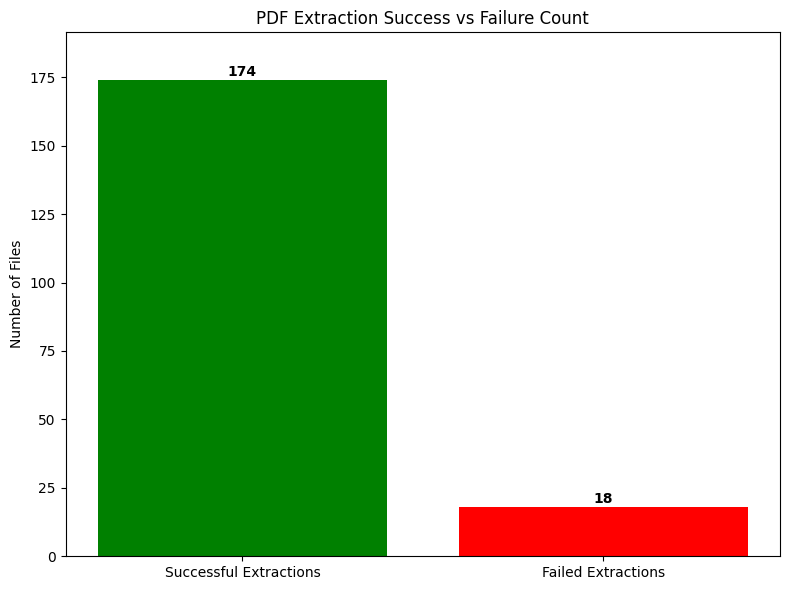

In [ ]:
# Save detailed logs to CSV
log_df = pd.DataFrame(detailed_logs)
try:
    os.makedirs(base_dir, exist_ok=True)
    log_df.to_csv(os.path.join(base_dir, "extraction_errors_log.csv"), index=False)
    print(
        f"\nDetailed error log saved to: {os.path.join(base_dir, 'extraction_errors_log.csv')}"
    )
except Exception as e:
    print(f"Error saving log CSV: {e}")
    print("Saving to current working directory instead.")
    log_df.to_csv("extraction_errors_log.csv", index=False)
    print("Saved to: extraction_errors_log.csv")

# Display DataFrames
print("\nSuccessful Extractions (Sample):")
print(success_df.head())

print("\nFailed Extractions (Sample):")
print(fail_df.head())

# ==============================
# Step 2: Visualize Counts (Bar Plot)
# ==============================
fig, ax = plt.subplots(figsize=(8, 6))
categories = ["Successful Extractions", "Failed Extractions"]
counts = [len(success_df), len(fail_df)]
colors = ["green", "red"]
bars = ax.bar(categories, counts, color=colors)
ax.set_ylabel("Number of Files")
ax.set_title("PDF Extraction Success vs Failure Count")
ax.set_ylim(0, max(counts) * 1.1)

for bar, count in zip(bars, counts):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        str(count),
        ha="center",
        va="bottom",
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

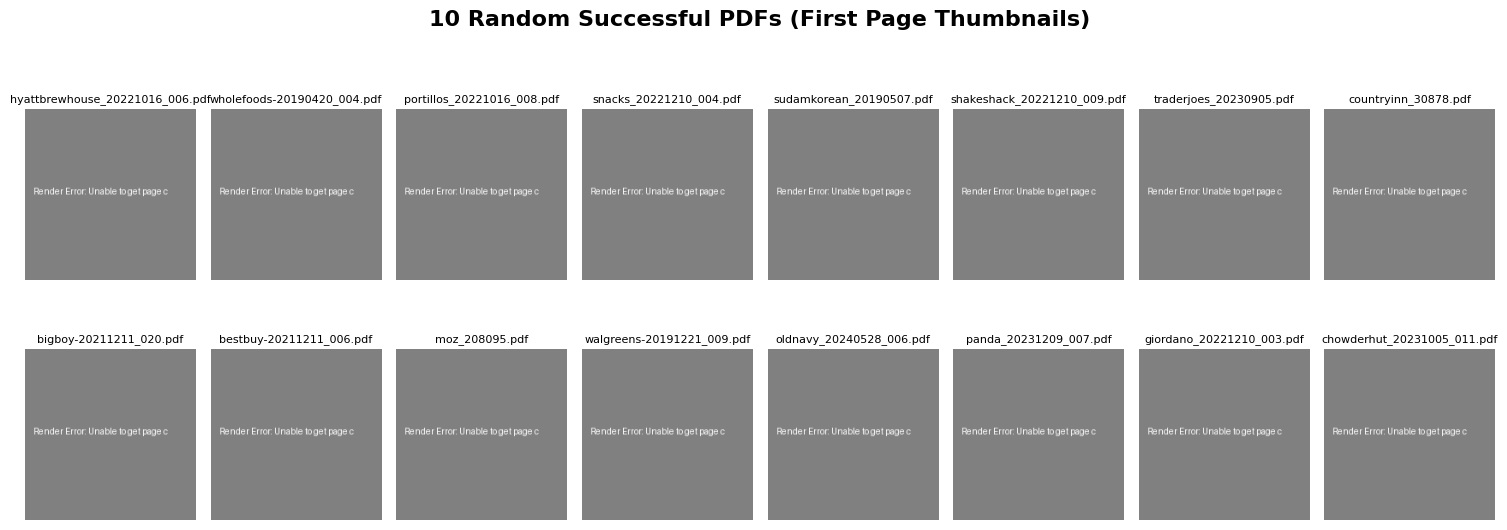

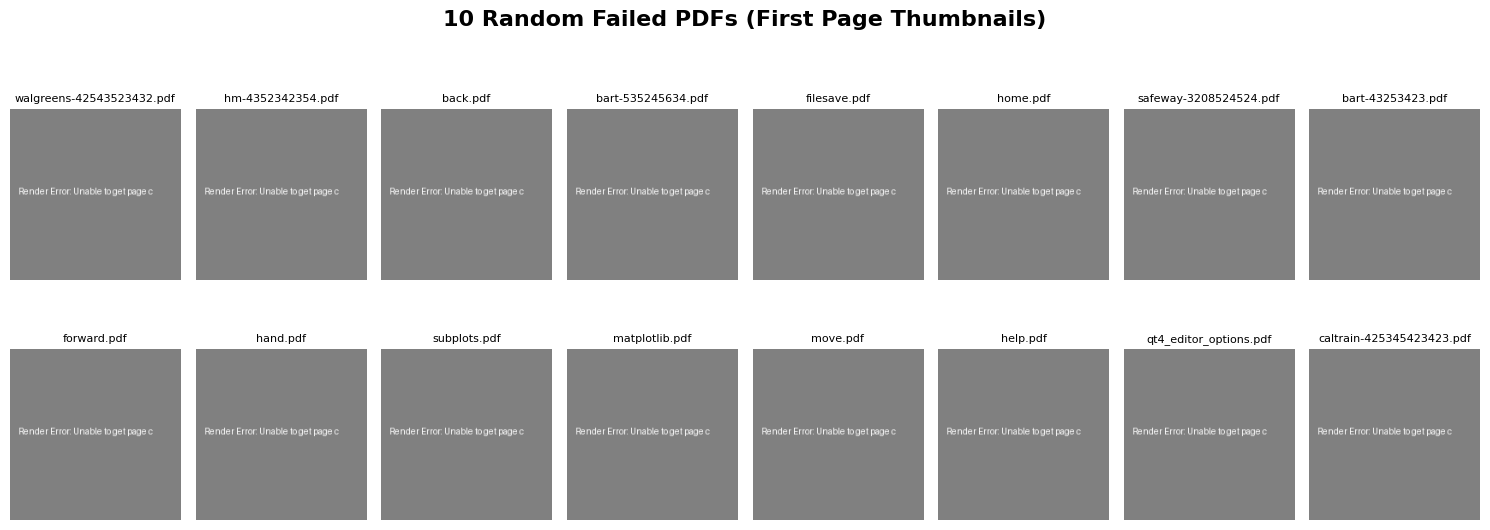


Successful Files Stats:
Average text length: 1294 chars
Average pages: 1.3

Failed Files Stats:
Common errors:
error_msg
Empty text on some pages    18
Name: count, dtype: int64


In [ ]:
# ==============================
# Step 3: Plot 10 Random PDF Images
# ==============================
def plot_pdf_thumbnails(pdf_paths, title, max_images=16, success=True):
    if len(pdf_paths) == 0:
        print(f"\n{title}: No files available.")
        return

    sample_paths = random.sample(pdf_paths, min(max_images, len(pdf_paths)))

    images = []
    for path in sample_paths:
        try:
            pil_images = convert_from_path(path, first_page=1, last_page=1, dpi=100)
            if pil_images:
                images.append(pil_images[0])
            else:
                img = Image.new("RGB", (200, 200), color="gray")
                draw = ImageDraw(img)
                draw.text((10, 90), "Failed to Render", fill="white")
                images.append(img)
        except Exception as e:
            print(f"Warning: Could not render {path}: {e}")
            img = Image.new("RGB", (200, 200), color="gray")
            draw = ImageDraw(img)
            draw.text((10, 90), f"Render Error: {str(e)[:20]}", fill="white")
            images.append(img)

    cols = 8
    rows = (len(images) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten() if rows > 1 else [axes]

    for idx, (img, path) in enumerate(zip(images, sample_paths)):
        axes[idx].imshow(img)
        axes[idx].set_title(os.path.basename(path), fontsize=8)
        axes[idx].axis("off")

    for idx in range(len(images), len(axes)):
        axes[idx].axis("off")

    plt.suptitle(title, fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()


success_paths = success_df["file_path"].tolist()
fail_paths = fail_df["file_path"].tolist()

plot_pdf_thumbnails(
    success_paths, "10 Random Successful PDFs (First Page Thumbnails)", success=True
)
plot_pdf_thumbnails(
    fail_paths, "10 Random Failed PDFs (First Page Thumbnails)", success=False
)

# ==============================
# Additional: Summary Statistics
# ==============================
if not success_df.empty:
    print(f"\nSuccessful Files Stats:")
    print(f"Average text length: {success_df['text_length'].mean():.0f} chars")
    print(f"Average pages: {success_df['num_pages'].mean():.1f}")

if not fail_df.empty:
    print(f"\nFailed Files Stats:")
    print("Common errors:")
    error_counts = fail_df["error_msg"].value_counts()
    print(error_counts.head(5))

In [44]:
success_df

,file_path,text_length,num_pages
0,f:\automate-accounts\automate-accouts-software...,2613,4
1,f:\automate-accounts\automate-accouts-software...,341,1
2,f:\automate-accounts\automate-accouts-software...,225,1
3,f:\automate-accounts\automate-accouts-software...,1236,1
4,f:\automate-accounts\automate-accouts-software...,668,1
...,...,...,...
169,f:\automate-accounts\automate-accouts-software...,1092,1
170,f:\automate-accounts\automate-accouts-software...,1607,1
171,f:\automate-accounts\automate-accouts-software...,448,1
172,f:\automate-accounts\automate-accouts-software...,1198,1


In [45]:
fail_df

,file_path,error_msg
0,f:\automate-accounts\automate-accouts-software...,Empty text on some pages
1,f:\automate-accounts\automate-accouts-software...,Empty text on some pages
2,f:\automate-accounts\automate-accouts-software...,Empty text on some pages
3,f:\automate-accounts\automate-accouts-software...,Empty text on some pages
4,f:\automate-accounts\automate-accouts-software...,Empty text on some pages
5,f:\automate-accounts\automate-accouts-software...,Empty text on some pages
6,f:\automate-accounts\automate-accouts-software...,Empty text on some pages
7,f:\automate-accounts\automate-accouts-software...,Empty text on some pages
8,f:\automate-accounts\automate-accouts-software...,Empty text on some pages
9,f:\automate-accounts\automate-accouts-software...,Empty text on some pages


Category Average Scores (Higher = More Relevant):
Retail: 1.73
Banking: 1.00
Restaurant: 0.51
Hotel: 0.44
Car: 0.24
Other: 0.21
Travel: 0.17


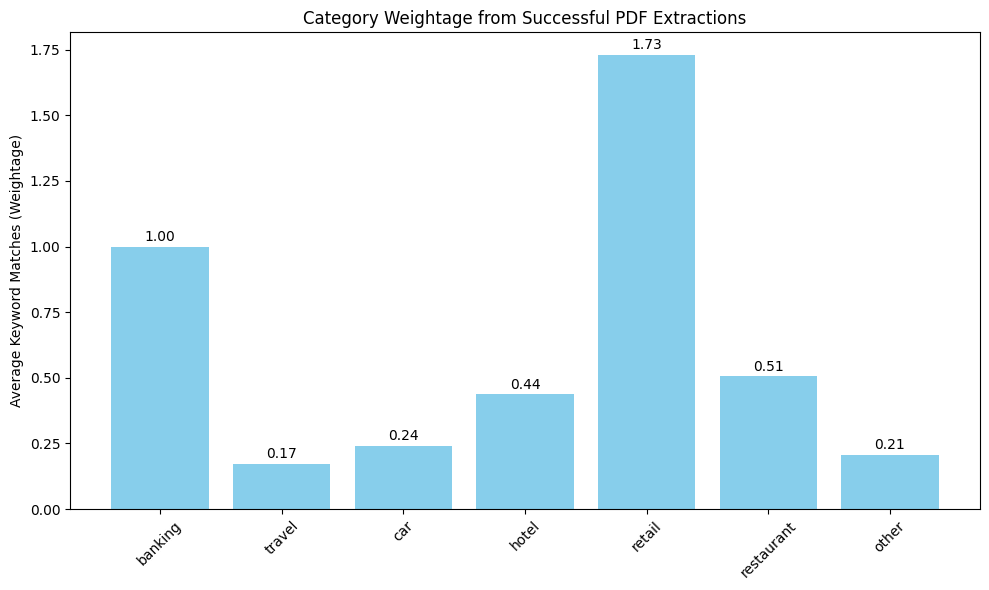

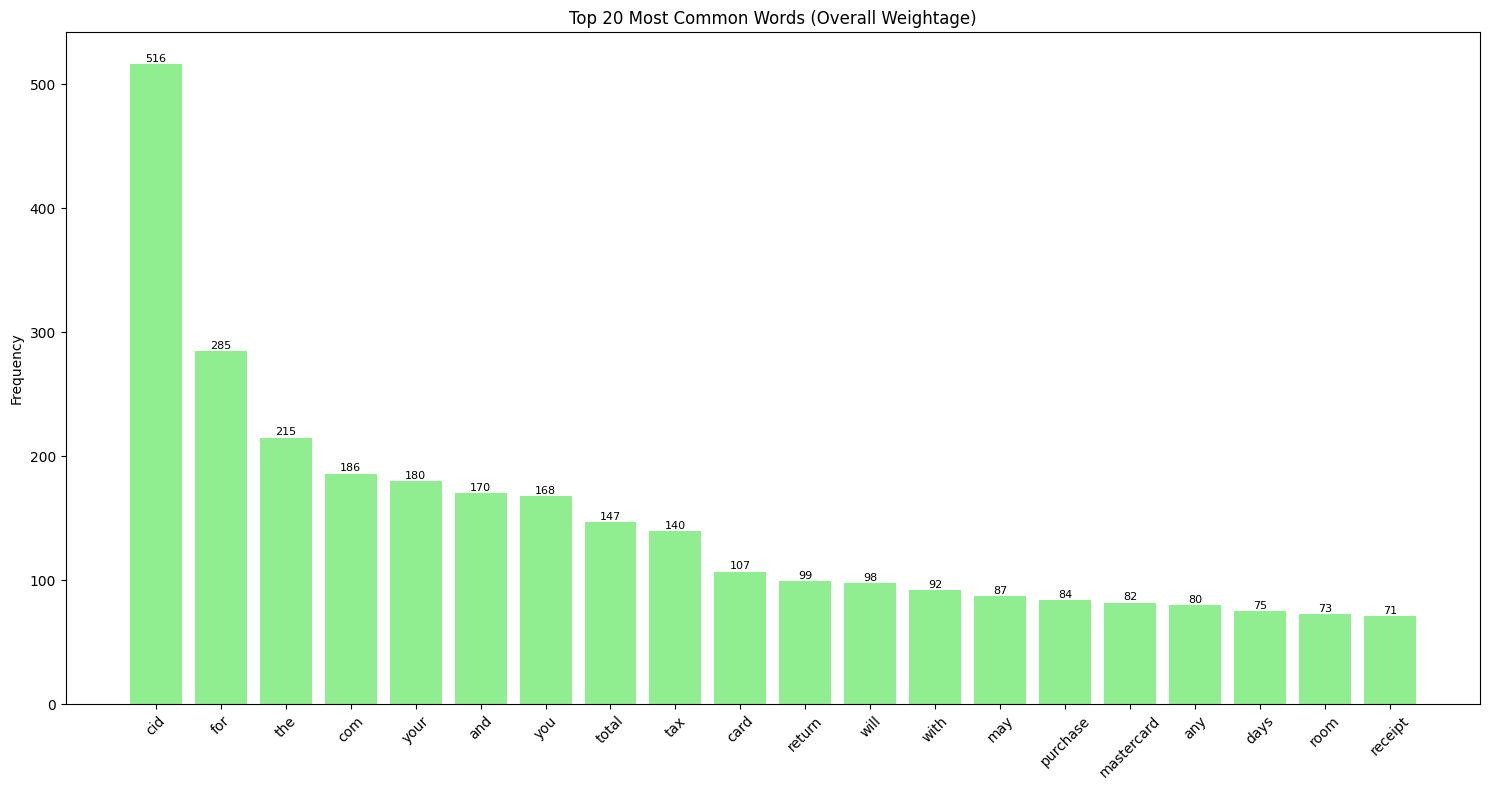

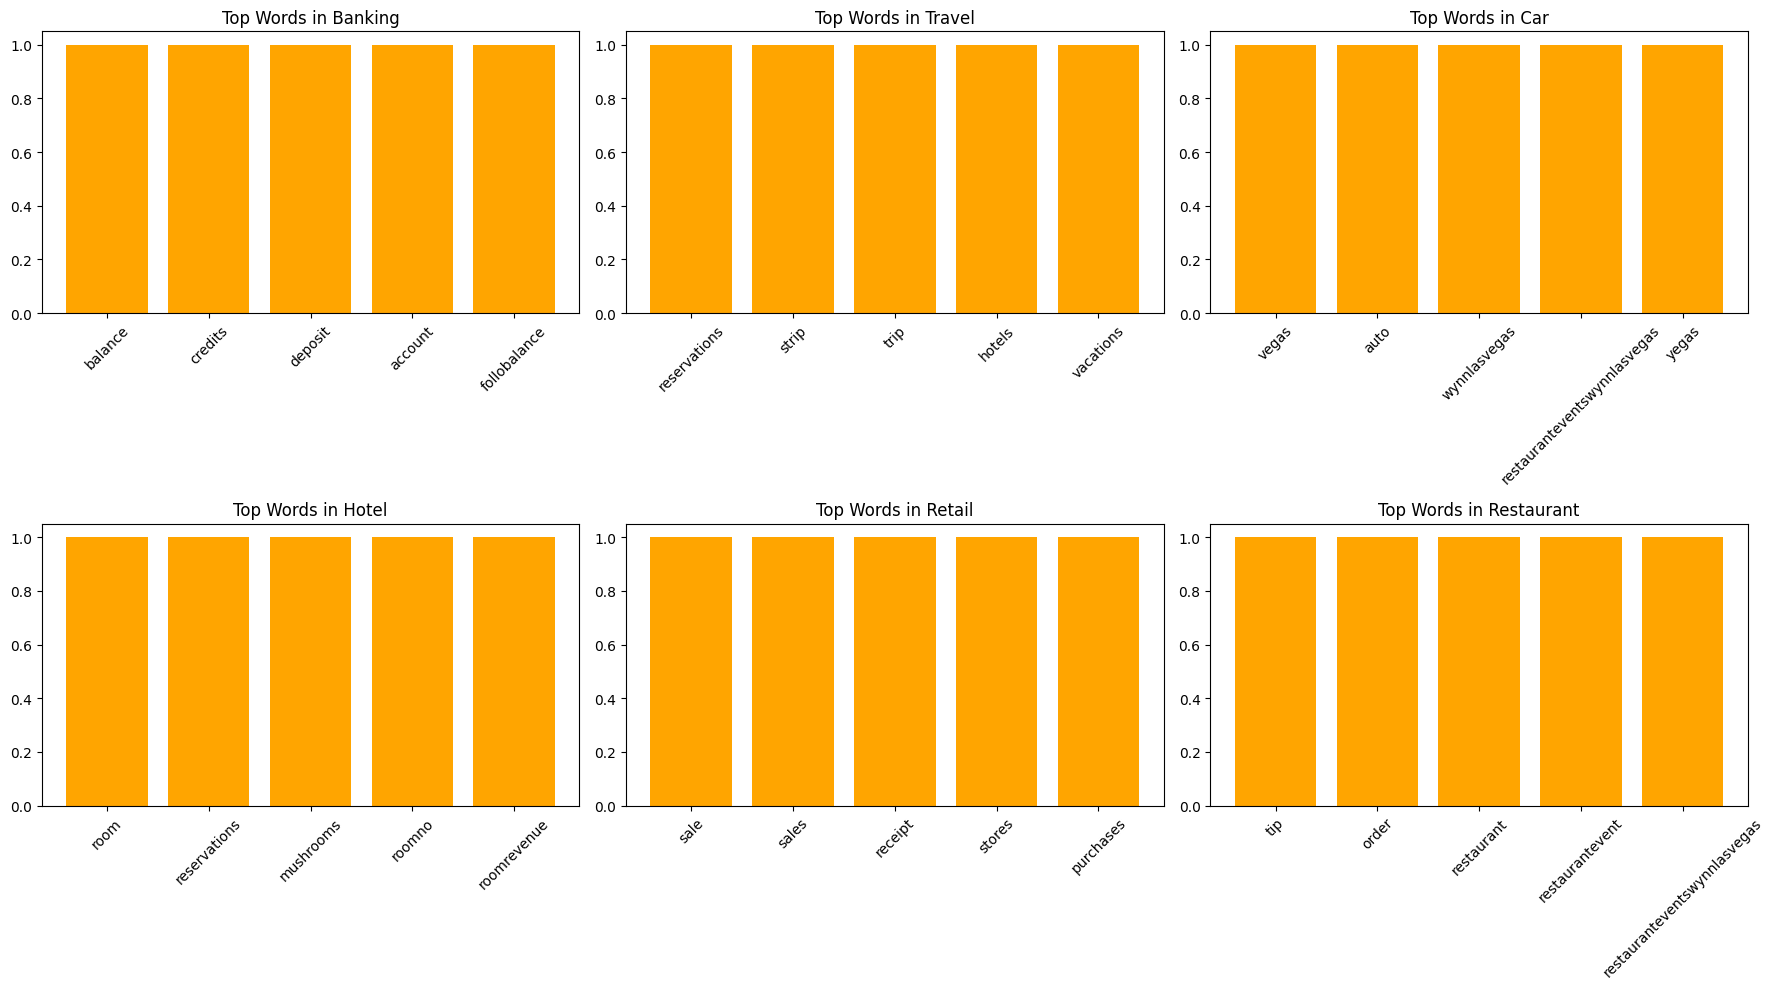


Recommended Focus Cluster: Retail
This category has the highest weightage, suggesting most PDFs relate to it.
Extract details like: transactions (banking), bookings (travel), etc.


In [ ]:
import os
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pdfplumber import open as pdf_open  # Assuming pdfplumber is imported

# ==============================
# Predefined Categories and Keywords
# ==============================
# Define categories with relevant keywords (case-insensitive, stemmed simply)
categories = {
    "banking": [
        "bank",
        "account",
        "deposit",
        "withdrawal",
        "loan",
        "credit",
        "debit",
        "atm",
        "transaction",
        "balance",
        "check",
        "wire",
        "transfer",
    ],
    "travel": [
        "flight",
        "hotel",
        "airfare",
        "reservation",
        "ticket",
        "boarding",
        "luggage",
        "mileage",
        "vacation",
        "trip",
    ],
    "car": [
        "gas",
        "fuel",
        "mileage",
        "repair",
        "tire",
        "oil",
        "auto",
        "vehicle",
        "parking",
        "toll",
    ],
    "hotel": [
        "room",
        "accommodation",
        "check-in",
        "check-out",
        "reservation",
        "night",
        "amenity",
        "lodging",
    ],
    "retail": [
        "store",
        "purchase",
        "item",
        "product",
        "sale",
        "discount",
        "receipt",
        "cashier",
    ],
    "restaurant": [
        "meal",
        "food",
        "dinner",
        "lunch",
        "breakfast",
        "tip",
        "order",
        "menu",
        "bill",
        "restaurant",
        "cafe",
    ],
    "other": [],  # Catch-all for non-matching
}


# Simple text cleaner
def clean_text(text):
    # Remove non-alphabetic words, lowercase, remove short words
    words = re.findall(r"\b[a-zA-Z]{3,}\b", text.lower())
    return words


# Extract text function (reuse from before, but store text)
def extract_text_pdfplumber(pdf_path):
    text = ""
    try:
        with pdf_open(pdf_path) as pdf:
            for page_num, page in enumerate(pdf.pages, 1):
                page_text = page.extract_text()
                if page_text:
                    text += page_text + "\n"
    except Exception as e:
        print(f"Error extracting {pdf_path}: {e}")
    return text


# ==============================
# Analyze Successful PDFs
# ==============================
# Assuming success_df from previous code exists; if not, re-run the previous cell or load it
# For demo, assume it's available. If many files, sample first 50 to avoid long runtime
if "success_df" not in globals():
    print("success_df not found. Please run the previous extraction code first.")
else:
    sample_success = success_df  # Limit to 50 for speed; adjust as needed
    category_scores = {
        cat: [] for cat in categories
    }  # List of scores per PDF per category
    all_words_counter = Counter()  # Global word frequency

    for idx, row in sample_success.iterrows():
        pdf_path = row["file_path"]
        text = extract_text_pdfplumber(pdf_path)  # Re-extract text
        words = clean_text(text)

        # Update global word counter
        all_words_counter.update(words)

        # Score per category
        doc_scores = {}
        for cat, keywords in categories.items():
            if cat == "other":
                continue  # Skip for now
            score = sum(words.count(kw) for kw in keywords)
            doc_scores[cat] = score
            category_scores[cat].append(score)

        # Assign to 'other' if no matches
        total_score = sum(doc_scores.values())
        if total_score == 0:
            category_scores["other"].append(1)  # Arbitrary 1 for non-empty docs
        else:
            category_scores["other"].append(0)

    # Aggregate scores (average weightage per category)
    avg_scores = {cat: np.mean(scores) for cat, scores in category_scores.items()}

    # Top words overall (for weightage visualization)
    top_words = all_words_counter.most_common(20)

    print("Category Average Scores (Higher = More Relevant):")
    for cat, score in sorted(avg_scores.items(), key=lambda x: x[1], reverse=True):
        print(f"{cat.capitalize()}: {score:.2f}")

# ==============================
# Visualization 1: Category Weightage Bar Plot
# ==============================
if "avg_scores" in locals():
    fig, ax = plt.subplots(figsize=(10, 6))
    cats = list(avg_scores.keys())
    scores = list(avg_scores.values())
    bars = ax.bar(cats, scores, color="skyblue")
    ax.set_ylabel("Average Keyword Matches (Weightage)")
    ax.set_title("Category Weightage from Successful PDF Extractions")
    ax.tick_params(axis="x", rotation=45)

    # Add value labels
    for bar, score in zip(bars, scores):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,
            f"{score:.2f}",
            ha="center",
            va="bottom",
        )

    plt.tight_layout()
    plt.show()

# ==============================
# Visualization 2: Top Word Frequency (Word Weightage)
# ==============================
if "top_words" in locals():
    words, counts = zip(*top_words)
    fig, ax = plt.subplots(figsize=(15, 8))
    bars = ax.bar(words, counts, color="lightgreen")
    ax.set_ylabel("Frequency")
    ax.set_title("Top 20 Most Common Words (Overall Weightage)")
    ax.tick_params(axis="x", rotation=45)

    # Add value labels
    for bar, count in zip(bars, counts):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.1,
            str(count),
            ha="center",
            va="bottom",
            fontsize=8,
        )

    plt.tight_layout()
    plt.show()

# ==============================
# Visualization 3: Per-Category Top Words (Optional, if you want deeper clustering)
# ==============================
# For each category, find top words that match keywords
if "all_words_counter" in locals():
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, (cat, keywords) in enumerate(categories.items()):
        if idx >= 6:  # Limit to 6 categories
            break
        cat_words = [w for w in all_words_counter if any(kw in w for kw in keywords)]
        cat_counter = Counter(cat_words)
        top_cat_words = cat_counter.most_common(5)

        if top_cat_words:
            w, c = zip(*top_cat_words)
            axes[idx].bar(w, c, color="orange")
            axes[idx].set_title(f"Top Words in {cat.capitalize()}")
            axes[idx].tick_params(axis="x", rotation=45)
        else:
            axes[idx].text(0.5, 0.5, "No matching words", ha="center", va="center")
            axes[idx].set_title(f"{cat.capitalize()}")

    plt.tight_layout()
    plt.show()

# ==============================
# Recommendations Based on Clusters
# ==============================
if "avg_scores" in locals():
    top_category = max(avg_scores, key=avg_scores.get)
    print(f"\nRecommended Focus Cluster: {top_category.capitalize()}")
    print("This category has the highest weightage, suggesting most PDFs relate to it.")
    print("Extract details like: transactions (banking), bookings (travel), etc.")

    # Suggest other high-scoring categories
    high_scores = {
        k: v for k, v in avg_scores.items() if v > 1.0
    }  # Threshold arbitrary
    if len(high_scores) > 1:
        print(
            "Other relevant clusters:",
            ", ".join(
                sorted(high_scores.keys(), key=lambda x: high_scores[x], reverse=True)
            ),
        )

In [20]:
import pytesseract

# Counting and Visualizing PDF Files in Nested Directories
This notebook demonstrates how to count all PDF files in a given directory and its subdirectories (including sub-subdirectories), and visualize the results. We use Python's `os` module for directory traversal, `collections` for counting, and `matplotlib` for visualization.

**Steps:**
1. Traverse the directory tree using `os.walk`.
2. Count PDF files in each folder.
3. Store counts in a dictionary.
4. Visualize the counts using a bar chart.
5. Optionally, display the directory tree structure with PDF counts.

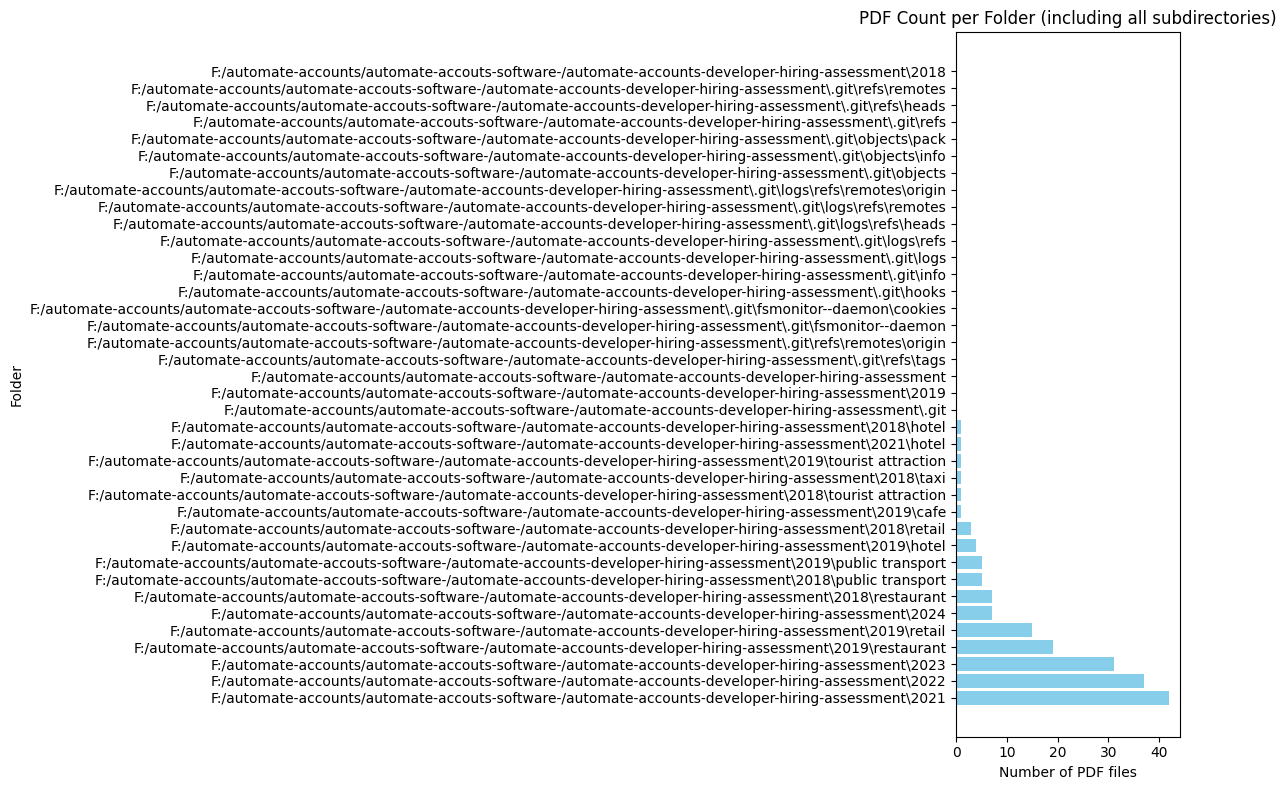

In [8]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

# Set the target directory to search for PDF files
target_dir = r"F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment"

# Dictionary to store PDF counts for each folder
pdf_counts = defaultdict(int)

# Traverse the directory tree
for root, dirs, files in os.walk(target_dir):
    # Count PDF files in the current directory
    pdf_count = sum(1 for f in files if f.lower().endswith(".pdf"))
    pdf_counts[root] = pdf_count

# Convert the results to a DataFrame for easy visualization
df = pd.DataFrame(
    {"Folder": list(pdf_counts.keys()), "PDF_Count": list(pdf_counts.values())}
)

# Sort the DataFrame by PDF count (descending)
df_sorted = df.sort_values("PDF_Count", ascending=False)

# Plot a horizontal bar chart of PDF counts per folder
plt.figure(figsize=(12, 8))
plt.barh(df_sorted["Folder"], df_sorted["PDF_Count"], color="skyblue")
plt.xlabel("Number of PDF files")
plt.ylabel("Folder")
plt.title("PDF Count per Folder (including all subdirectories)")
plt.tight_layout()
plt.show()

# --- Explanation for Students ---
# 1. We use os.walk to visit every folder and subfolder.
# 2. For each folder, we count files ending with .pdf (case-insensitive).
# 3. Results are stored in a dictionary, then converted to a DataFrame for sorting and plotting.
# 4. The bar chart shows which folders have the most PDF files.
# 5. This approach works for any level of nested folders.

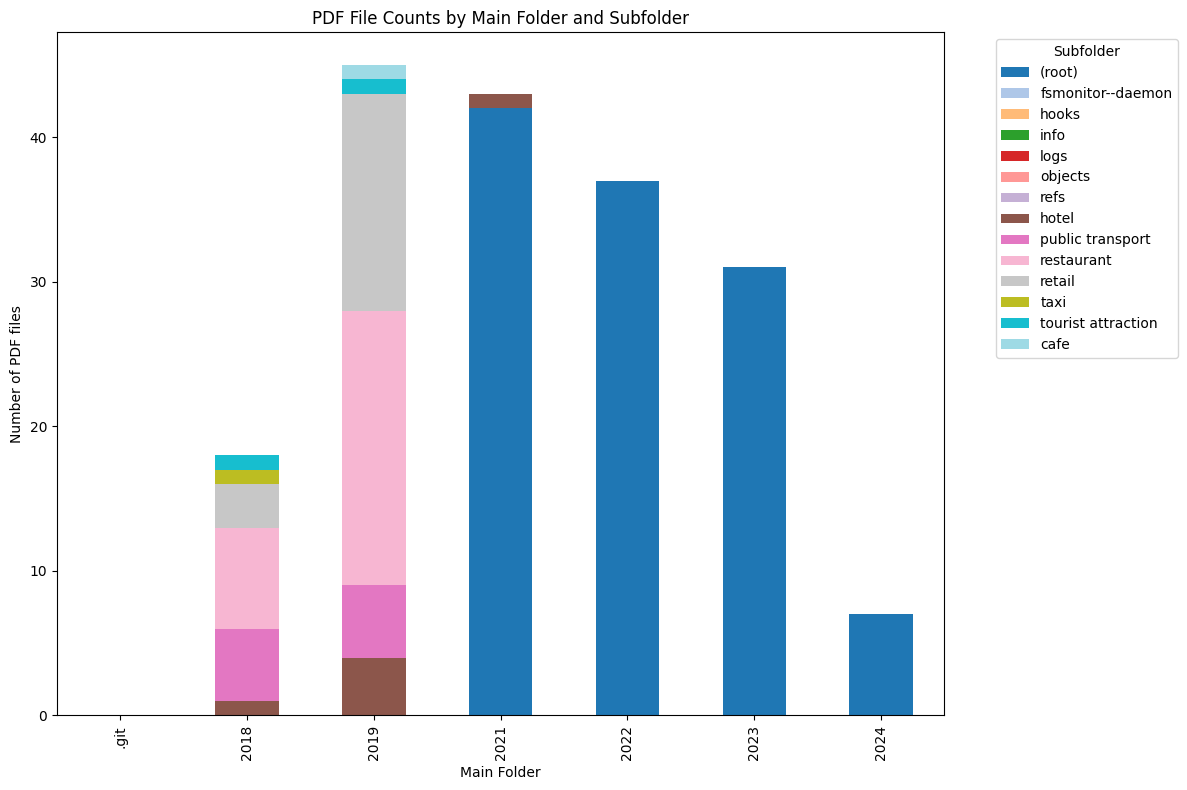

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the target directory
target_dir = r"F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment"

# Prepare a dictionary to hold counts: {main_folder: {subfolder: count}}
pdf_counts = {}

for root, dirs, files in os.walk(target_dir):
    # Get relative path from target_dir
    rel_path = os.path.relpath(root, target_dir)
    parts = rel_path.split(os.sep)
    if len(parts) == 1 and parts[0] == ".":
        continue  # skip the root itself
    main_folder = parts[0]
    subfolder = parts[1] if len(parts) > 1 else "(root)"
    count = sum(1 for f in files if f.lower().endswith(".pdf"))
    if main_folder not in pdf_counts:
        pdf_counts[main_folder] = {}
    pdf_counts[main_folder][subfolder] = (
        pdf_counts[main_folder].get(subfolder, 0) + count
    )

# Convert to DataFrame for plotting
df = pd.DataFrame(pdf_counts).fillna(0).astype(int)

# Plot stacked bar chart
ax = df.T.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="tab20")
plt.xlabel("Main Folder")
plt.ylabel("Number of PDF files")
plt.title("PDF File Counts by Main Folder and Subfolder")
plt.legend(title="Subfolder", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --- Explanation for Students ---
# 1. We use os.walk to traverse all folders and subfolders.
# 2. For each folder, we count PDF files and organize counts by main folder and subfolder.
# 3. The DataFrame is constructed so each main folder is a bar, and subfolders are stacked segments.
# 4. The colormap automatically assigns different colors to each subfolder.
# 5. The code works for any folder names and any number of subfolders.

In [5]:
import os
import pandas as pd
import plotly.graph_objects as go

# Set the target directory
target_dir = r"F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment"

# Prepare a dictionary to hold counts: {main_folder: {subfolder: count}}
pdf_counts = {}

for root, dirs, files in os.walk(target_dir):
    rel_path = os.path.relpath(root, target_dir)
    parts = rel_path.split(os.sep)
    if len(parts) == 1 and parts[0] == ".":
        continue  # skip the root itself
    main_folder = parts[0]
    subfolder = parts[1] if len(parts) > 1 else "(root)"
    count = sum(1 for f in files if f.lower().endswith(".pdf"))
    if main_folder not in pdf_counts:
        pdf_counts[main_folder] = {}
    pdf_counts[main_folder][subfolder] = (
        pdf_counts[main_folder].get(subfolder, 0) + count
    )

# Convert to DataFrame for plotting
df = pd.DataFrame(pdf_counts).fillna(0).astype(int)

# Prepare data for stacked bar chart
main_folders = df.columns.tolist()
subfolders = df.index.tolist()

fig = go.Figure()
for subfolder in subfolders:
    fig.add_trace(
        go.Bar(
            x=main_folders,
            y=df.loc[subfolder],
            name=subfolder,
            text=df.loc[subfolder],
            textposition="auto",
            hovertemplate=f"Main Folder: %{{x}}<br>Subfolder: {subfolder}<br>PDF Count: %{{y}}<extra></extra>",
        )
    )

fig.update_layout(
    barmode="stack",
    title={
        "text": "PDF File Counts by Main Folder and Subfolder",
        "x": 0.5,
        "xanchor": "center",
        "font": {"size": 22, "color": "darkblue"},
    },
    xaxis_title="Main Folder",
    yaxis_title="Number of PDF files",
    legend_title="Subfolder",
    legend=dict(x=1.02, y=1, bordercolor="Black", borderwidth=1),
    margin=dict(l=40, r=40, t=80, b=40),
    plot_bgcolor="white",
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor="lightgray")
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor="lightgray")

fig.show()

# --- Explanation ---
# - This script uses Plotly for interactive, annotated stacked bar charts.
# - Each bar represents a main folder, with subfolders stacked and labeled.
# - Hover tooltips show folder, subfolder, and PDF count for explainability.
# - Works in Jupyter and as a standalone Python script.

#   SpaCy


### Here is a concise explanation of the spaCy entity labels you mentioned:

CARDINAL: Any number (not a date, time, money, or measurement), e.g., "123", "one hundred".
GPE: Geopolitical Entity (country, city, state, etc.), e.g., "India", "New York".
WORK OF ART: Titles of books, songs, artworks, etc., e.g., "Mona Lisa", "War and Peace".
MONEY: Monetary values, e.g., "$100", "EUR 50".
These labels help you understand the type of information spaCy extracts from your PDF text.

### SpaCY Exaple usage 

In [5]:
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = (
    "When Sebastian Thrun started working on self-driving cars at "
    "Google in 2007, few people outside of the company took him "
    "seriously. “I can tell you very senior CEOs of major American "
    "car companies would shake my hand and turn away because I wasn’t "
    "worth talking to,” said Thrun, in an interview with Recode earlier "
    "this week."
)
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun GPE
Recode ORG
earlier this week DATE


In [7]:
pdf_path_2 = "F:\\automate-accounts\\automate-accouts-software-\\automate-accounts-developer-hiring-assessment\\2019\hotel\\countryinn_30878.pdf"

In [8]:
import pdfplumber
import os


# Method 1: pdfplumber (text extraction)
def extract_text_pdfplumber(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return print(text)


extract_text_pdfplumber(pdf_path_2)
print("text")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

เ
é
■لهؤؤ١مياعا
بقوا"لؤ|ص
٠
4345 E! Camino Rea!. Palo Alto CA 94306 Те!: 650-948-9154 * Fax 650-949-4190
I Email: count^inn_motel@yahoo.com Web: ww".pa!0a!toC0unt٩,inn.com
Room: Тб А Payment : MASTER CARD
WALTER, JENS ТА, OK, OB Guest
RA
UNTERSBERGSTR 84 May б, 20Τ9
MUNICH May ТО, 20Τ9
8Τ539 T90TFM
Date Trans Room Comment Debit Credit Balance
May 6'T9 ROOM Тб 2Τ4.00 2Τ4.00
May 6'Τ9 TAX Τ6 29.96 243.96
May 6'Τ9 CT ASSESMENT Τ6 0.20 244.Тб
May6'T9STASSESMENT Тб 0.42 244.58
May 7'Τ9 ROOM Тб 2Τ4.00 458.58
May 7'Τ9 TAX Тб 29.96 488.54
May7'T9CTASSESMENT Тб 0.20 488.74
May7'T9STASSESMENT Тб 0.42 489.Тб
May 8'Τ9 ROOM Тб 2Τ4.00 703.Тб
May 8'T9 TAX Тб 29.96 733.Τ2
May 8'T9 CT ASSESMENT Тб 0.20
May8'T9STASSESMENT Тб 0.42 733.74
May 9'T9 ROOM Тб 2Τ4.00 947.74
May 9'Τ9 TAX Тб 29.96 لأ٦٦.٦ة
May9'T9CTASSESMENT Тб 0.20 لأ11 .ألاب
May9'T9STASSESMENT Тб 0.42 978.32
MayTO'Τ9 MASTER CARD Тб 978.32 CR 0.00
ХХХХХХХХХХХХ5052/1п٧#30878/АиЕЬ:347460 {manuaT-inputإ
Balance due at checkout $ 0.00
X
Guest Signatu

In [ ]:
extract_text_pdfplumber(pdf_path_2)
print("text")
doc = nlp(text)


for token in doc:
    print(
        token.text,
        token.lemma_,
        token.pos_,
        token.tag_,
        token.dep_,
        token.shape_,
        token.is_alpha,
        token.is_stop,
    )

text


In [48]:
pdf_path_2

'F:\\automate-accounts\\automate-accouts-software-\\automate-accounts-developer-hiring-assessment\\2019\\hotel\\countryinn_30878.pdf'

In [ ]:
import spacy
from spacy.tokens import DocBin

nlp = spacy.blank("en")
doc_bin = DocBin().from_disk(
    "F:/automate-accounts/automate-accouts-software-/train.spacy"
)
docs = list(doc_bin.get_docs(nlp.vocab))

In [55]:
docs

[Receipt ID: R12345, purchased at 2023-09-07 from Walmart, total $59.99,
 Paid with VISA card 1234-5678-9876-5432,
 Transaction ID TXN556677, 3 items purchased]

In [ ]:
def extract_text_pdfplumber(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return print(text)  # ❌ Problem: this returns None


def extract_text_pdfplumber(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text  # ✅ return the text, not print


import train_data
from train_data import CUSTOM_LABELS


def test_pdf(pdf_path, expected_features=CUSTOM_LABELS):
    # Step 1: extract text
    text = extract_text_pdfplumber(pdf_path)
    if not isinstance(text, str):
        raise TypeError(f"Expected string but got {type(text)}")  # debug safeguard

    # Step 2: run through model
    doc = nlp(text)

    # Step 3: collect predictions
    extracted = {label: [] for label in expected_features}
    for ent in doc.ents:
        if ent.label_ in extracted:
            extracted[ent.label_].append(ent.text)

    # Step 4: check missing features
    missing = [f for f, vals in extracted.items() if not vals]

    return extracted, missing

In [ ]:
extracted, missing = test_pdf(pdf_path_2, expected_features=CUSTOM_LABELS)

print("Extracted:", extracted)
print("Missing:", missing)

Extracted: {'RECEIPT_ID': [], 'PURCHASED_AT': [], 'MERCHANT_NAME': [], 'TOTAL_AMOUNT': [], 'FILE_PATH': [], 'CARD_DETAILS': [], 'PAYMENT_METHOD': [], 'ADDRESS': [], 'PURCHASE_QUANTITY': [], 'TRANSACTION_ID': [], 'ITEM': []}
Missing: ['RECEIPT_ID', 'PURCHASED_AT', 'MERCHANT_NAME', 'TOTAL_AMOUNT', 'FILE_PATH', 'CARD_DETAILS', 'PAYMENT_METHOD', 'ADDRESS', 'PURCHASE_QUANTITY', 'TRANSACTION_ID', 'ITEM']


In [62]:
pdf_path_2

'F:\\automate-accounts\\automate-accouts-software-\\automate-accounts-developer-hiring-assessment\\2019\\hotel\\countryinn_30878.pdf'

In [ ]:
def extract_text_pdfplumber(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text  # ✅ return the text, not print


extract_text_pdfplumber(pdf_path_2)

'เ\né\n■لهؤؤ١مياعا\nبقوا"لؤ|ص\n٠\n4345 E! Camino Rea!. Palo Alto CA 94306 Те!: 650-948-9154 * Fax 650-949-4190\nI Email: count^inn_motel@yahoo.com Web: ww".pa!0a!toC0unt٩,inn.com\nRoom: Тб А Payment : MASTER CARD\nWALTER, JENS ТА, OK, OB Guest\nRA\nUNTERSBERGSTR 84 May б, 20Τ9\nMUNICH May ТО, 20Τ9\n8Τ539 T90TFM\nDate Trans Room Comment Debit Credit Balance\nMay 6\'T9 ROOM Тб 2Τ4.00 2Τ4.00\nMay 6\'Τ9 TAX Τ6 29.96 243.96\nMay 6\'Τ9 CT ASSESMENT Τ6 0.20 244.Тб\nMay6\'T9STASSESMENT Тб 0.42 244.58\nMay 7\'Τ9 ROOM Тб 2Τ4.00 458.58\nMay 7\'Τ9 TAX Тб 29.96 488.54\nMay7\'T9CTASSESMENT Тб 0.20 488.74\nMay7\'T9STASSESMENT Тб 0.42 489.Тб\nMay 8\'Τ9 ROOM Тб 2Τ4.00 703.Тб\nMay 8\'T9 TAX Тб 29.96 733.Τ2\nMay 8\'T9 CT ASSESMENT Тб 0.20\nMay8\'T9STASSESMENT Тб 0.42 733.74\nMay 9\'T9 ROOM Тб 2Τ4.00 947.74\nMay 9\'Τ9 TAX Тб 29.96 لأ٦٦.٦ة\nMay9\'T9CTASSESMENT Тб 0.20 لأ11 .ألاب\nMay9\'T9STASSESMENT Тб 0.42 978.32\nMayTO\'Τ9 MASTER CARD Тб 978.32 CR 0.00\nХХХХХХХХХХХХ5052/1п٧#30878/АиЕЬ:347460 {manuaT-inpu

In [ ]:
def extract_text_pdfplumber(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text  # ✅ return the text, not print


extract_text_pdfplumber(pdf_path_2)


PDF: chickfila_20221016_005.pdf

--- pdfplumber Extracted Text ---
Welcome to Chìck-fil-Α
Loyola In-Line (#02841)
Chicago, IL
Phone: 312-266'
Operator: Lauren Slllch
CUSIOMER COPY
9/28/20228:41 :23 PM
OIME IN
Older Number; 11127591
1 Meal-SpcyD1x+PJ 10.59
SpcyOlx +PJ
Fries LG 0.40
Coke MO
Sub. Total ; $10.99
Tax; $1 .29
Total ; $12,28
Change 00
Mastercard; $12,28
Reg1ster:4 1'ran Seq N0:11127591
Cashier;Anthony
We are hiring GREAT people like yoLii
Text "CFA" to (312) 561-4919
.chick-f11-a.com/forgottoscan
Restroom Code: 8407
Sep 28 2022 8:41 pm
Card Number ببب*ب؛بب؛؛؛بب؛٠؛ب4528
Card Type MASTER CARD
Approval
AID Α0000000041010


--- spaCy Named Entities ---
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' opti

,Entity,Label
0,Chìck,GPE
1,02841,MONEY
2,Chicago,GPE
3,312,CARDINAL
4,Lauren Slllch\nCUSIOMER COPY,PERSON
5,9/28/20228:41,CARDINAL
6,23 PM,TIME
7,Older Number,WORK_OF_ART
8,11127591,DATE
9,1,CARDINAL



PDF: bestbuy_20211211_006.pdf

--- pdfplumber Extracted Text ---
〔 山 Ⅲ 〒 １ Ｅ 手 ｌ １ １ Ｖ Ｉ Ｃ０ ｎ 〕 ｍ 可 １ 戸 卜 ｅ ７ １ Ｒ 〕 丁 ｌ Ｔ ４ ‐ Ｍ Ｎ Ｏ Ｆ Ｄ ｎ Ｕ 叩 ｎ ｂ （ ｕ （ ご ｅ 白 Ⅱ 〒 ｌ Ｓ ｌ 』 〔 Ｋ ｌ Ｔ Ｆ 』 Ｖ Ｉ Ｊ Ｂ Ｒ ｕ Ｖ Ｃ Ｕ Ｅ Ｒ ＃ ９ １ １ ０ ７ ３ ４ ８
ｌ
llllllllllしlllllllllllllllllllＵlllllllllllllllllllII|||||
Val;100001-600535-246340-933423-483269-23295
0103041 5935 12／02/21 20：35
４ｑ〈ｎＱ４４ ＨＨＥ７３ＲＨ／Ｒ １７９ ００
１ 〆 、 〆 、 ／ ， ジ ４ ‐ ４ ‐ 。 Ｉ Ｕ 〈 Ｈ Ｑ 〕 （ ご Ｒ 〕 （ ｂ 〔 ら ５ ， １ （ ご Ｒ 〕 〔 ｂ 〔 ご 〉 Ｔ ｌ Ｅ ａ ｌ Ｆ 上 ａ 剣 １ ， Ｋ ａ ４ ｌ Ｆ に ａ ｚ ｎ Ｋ ｒ ｉ １ Ｆ Ｄ 〒 ’ ’ １ Ｆ ｂ ｎ 〕 ‐ ｌ ｒ Ｏ 〒 ｌ １ ｌ ‐ 、 １ ． １ ｅ ｎ ） Ｅ １ １ Ｍ Ⅷ ｅ 剣 Ｉ ｅ ‐ 〔 Ｕ ａ ｓ 之 ） 『 Ｉ Ｓ 〈 Ｕ 〔 Ｕ Ｓ ぐ Ｉ Ｚ ） Ｓ ｎ Ｕ １ １ 〈 Ｕ （ 口 ｝ Ｉ ｝ Ｉ 〒 Ｉ Ｍ Ⅱ 〒 ｌ 什 廿 ａ Ｍ 川 ａ 〆 ｂ ａ ｎ ｕ ａ ｘ Ｉ × Ｘ Ｎ Ｘ く ３ Ｓ Ｏ Ｌ Ｏ Ｎ Ｏ Ｔ Ｒ Ｙ Ｉ Ｌ １ ０ Ｉ Ｈ Ｏ ６ ６ １ ６ Ｎ Ｇ Ｓ Ｐ １ ０ Ｉ Ｔ Ｔ ６ Ｋ Ｔ Ｎ Ｔ Ｈ Ｉ Ｆ Ｅ ９ 》 Ｒ Ｒ Ｓ 月 Ｒ Ｎ ６ Ｌ ぜ Ｊ Ｌ Ｌ Ｅ Ｅ Ⅱ ０ Ｆ Ｅ Ｒ Ｏ １ Ｎ Ｉ Ｒ Ｉ ９ １ Ｔ ６ Ｔ Ｅ Ｔ Ｏ Ｔ Ｃ Ｅ Ｓ Ｅ Ｅ Ｅ Ｆ Ｓ １〔 Ｕ Ｆ 卜 〔 Ｕ 〈 同 ｕ １ Ｎ Ｎ １ ， Ｋ Ｆ ｒ Ｐ ‐ ｂ ｅ １ “ 命 Ｉ Ｆ に ０ （ Ｕ ｐ ‐ 〈 Ｕ ‐ ↑ ‐ ← 上 ． 〈 Ｈ ‐ Ｏ 〈 Ｕ ｐ Ｉ ハ Ｕ Ｆ に （ Ｕ Ｚ ） Ｆ ト ０ ｐ Ｉ 〈 Ｕ （ （ Ｕ Ｏ Ｌ 、 Ｆ 〔 

,Entity,Label
0,１,CARDINAL
1,７ １ Ｒ,QUANTITY
2,Ⅱ,ORG
3,5935,DATE
4,12／02/21 20：35,DATE
5,１７９ ００,CARDINAL
6,４ ‐ ４ ‐,MONEY
7,５ ， １ （,ORG
8,４,CARDINAL
9,１ ｌ ‐,QUANTITY


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


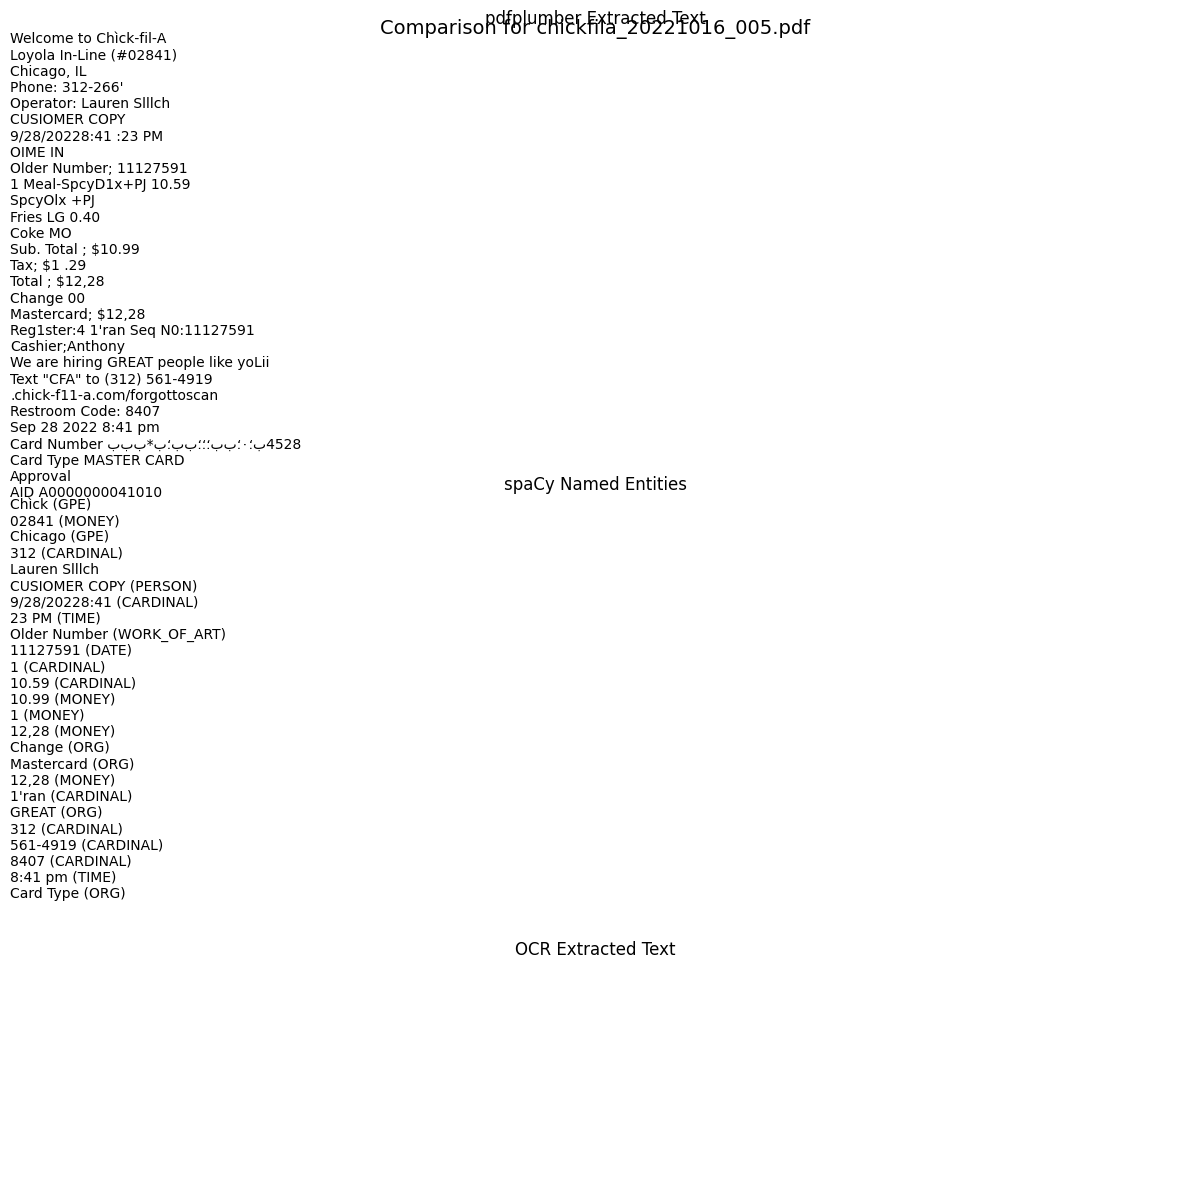

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


C:\Users\amans\AppData\Local\Temp\ipykernel_27064\1476388467.py:93: UserWarning: Glyph 12308 (\N{LEFT TORTOISE SHELL BRACKET}) missing from current font.
  plt.tight_layout()
C:\Users\amans\AppData\Local\Temp\ipykernel_27064\1476388467.py:93: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  plt.tight_layout()
C:\Users\amans\AppData\Local\Temp\ipykernel_27064\1476388467.py:93: UserWarning: Glyph 12306 (\N{POSTAL MARK}) missing from current font.
  plt.tight_layout()
C:\Users\amans\AppData\Local\Temp\ipykernel_27064\1476388467.py:93: UserWarning: Glyph 65297 (\N{FULLWIDTH DIGIT ONE}) missing from current font.
  plt.tight_layout()
C:\Users\amans\AppData\Local\Temp\ipykernel_27064\1476388467.py:93: UserWarning: Glyph 65317 (\N{FULLWIDTH LATIN CAPITAL LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\amans\AppData\Local\Temp\ipykernel_27064\1476388467.py:93: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from curren

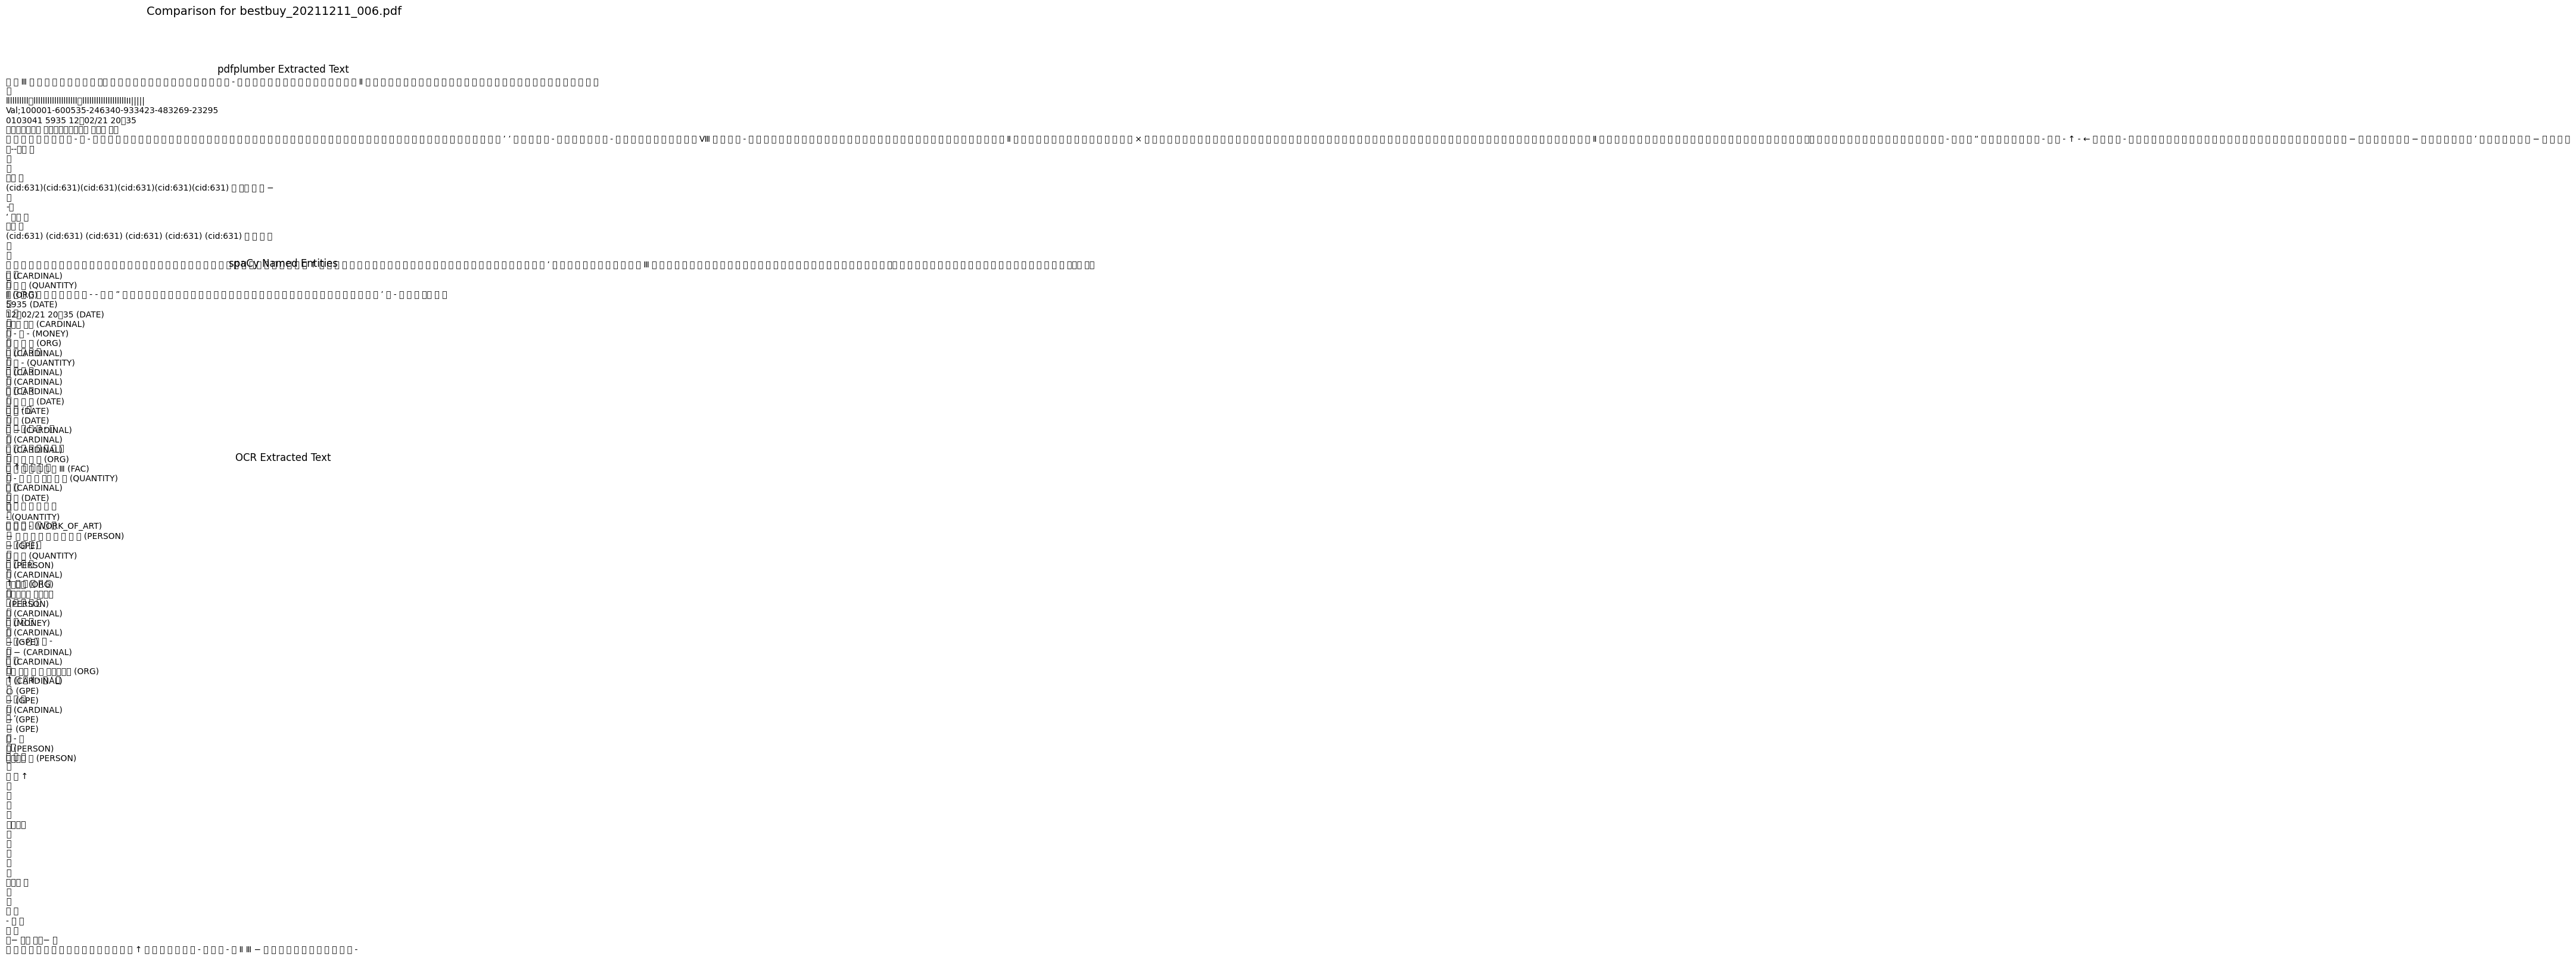

In [ ]:
import os
import pdfplumber
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Markdown
import spacy


# Method 1: pdfplumber (text extraction)
def extract_text_pdfplumber(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text


# Method 2: spaCy (NER on extracted text)
def extract_entities_spacy(text):
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


# Method 3: OCR (pdf2image + pytesseract)
def extract_text_ocr(pdf_path):
    try:
        from pdf2image import convert_from_path
        import pytesseract

        pages = convert_from_path(pdf_path, dpi=200)
        ocr_text = ""
        for i, page in enumerate(pages, start=1):
            text = pytesseract.image_to_string(page, lang="eng")
            ocr_text += f"--- Page {i} ---\n{text}\n"
        return ocr_text
    except Exception as e:
        return f"OCR extraction failed: {e}"


# List of PDFs to compare
pdfs = [
    r"F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment/2022/chickfila_20221016_005.pdf",
    r"F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment/2021/bestbuy_20211211_006.pdf",
]

for pdf_path in pdfs:
    print(f"\n{'='*120}\nPDF: {os.path.basename(pdf_path)}\n{'='*120}")
    # Method 1: pdfplumber
    text_pdfplumber = extract_text_pdfplumber(pdf_path)
    print("\n--- pdfplumber Extracted Text ---")
    print(text_pdfplumber)
    # Method 2: spaCy NER
    print("\n--- spaCy Named Entities ---")
    entities = extract_entities_spacy(text_pdfplumber)
    if entities:
        df_entities = pd.DataFrame(entities, columns=["Entity", "Label"])
        display(df_entities)
    else:
        print("No entities found.")
    # Method 3: OCR
    # print("\n--- OCR Extracted Text (pdf2image + pytesseract) ---")
    # ocr_text = extract_text_ocr(pdf_path)
    # print(ocr_text)
    # print("\n" + "-"*80)

# Visualization: Compare methods in subrows
for pdf_path in pdfs:
    text_pdfplumber = extract_text_pdfplumber(pdf_path)
    entities = extract_entities_spacy(text_pdfplumber)
    # ocr_text = extract_text_ocr(pdf_path)
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    axes[0].set_title("pdfplumber Extracted Text")
    axes[0].text(0, 1, text_pdfplumber[:2000], va="top", wrap=True, fontsize=10)
    axes[0].axis("off")
    axes[1].set_title("spaCy Named Entities")
    if entities:
        entity_str = "\n".join([f"{e[0]} ({e[1]})" for e in entities])
        axes[1].text(0, 1, entity_str[:2000], va="top", wrap=True, fontsize=10)
    else:
        axes[1].text(0, 1, "No entities found.", va="top", wrap=True, fontsize=10)
    axes[1].axis("off")
    axes[2].set_title("OCR Extracted Text")

    axes[2].axis("off")
    plt.tight_layout()
    plt.suptitle(f"Comparison for {os.path.basename(pdf_path)}", fontsize=14)
    plt.show()

# Notebook: When you see an entity labeled as "CARDINAL" in the spaCy output, it means spaCy has identified a number in the text that is not a date, time, or monetary value. For example, in the code cell that prints named entities, any number extracted from the PDF text and labeled "CARDINAL" is just a plain number.

### Summary:
CARDINAL = any number (not a date, time, money, or measurement) detected in the text.




# In spaCy's Named Entity Recognition (NER), the label "GPE" stands for "Geopolitical Entity."


### This refers to names of countries, cities, states, provinces, or other locations that are political or geographic regions.

Examples of GPE entities:

"India"
"New York"
"California"
"Europe"
"Tokyo"
Summary:
GPE = any country, city, state, or other geopolitical location detected in the text.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp("Chick-fil-A had sales of $5.8 billion in 2022.")
for ent in doc.ents:
    print(ent.text, ent.label_)

$5.8 billion MONEY
2022 DATE


In [ ]:
import os
import pdfplumber
import spacy
import numpy as np
import pandas as pd

# Load spaCy with embeddings
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    import spacy.cli

    spacy.cli.download("en_core_web_md")
    nlp = spacy.load("en_core_web_md")

BASE_DIR = r"F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment"
OUTPUT_DIR = "embeddings"
os.makedirs(OUTPUT_DIR, exist_ok=True)


def process_pdf(pdf_path, year_folder):
    pdf_name = os.path.basename(pdf_path).replace(".pdf", "")

    with pdfplumber.open(pdf_path) as pdf:
        for page_num, page in enumerate(pdf.pages, start=1):
            text = page.extract_text()
            if not text:
                continue

            # Process text with spaCy
            doc = nlp(text)

            # === Per-token embeddings ===
            tokens = [t.text for t in doc if t.has_vector]
            embeddings = np.array([t.vector for t in doc if t.has_vector])

            # Save embeddings
            token_file = os.path.join(
                OUTPUT_DIR, year_folder, f"{pdf_name}_page{page_num}_tokens.npy"
            )
            os.makedirs(os.path.dirname(token_file), exist_ok=True)
            np.save(token_file, embeddings)

            # Save metadata CSV
            token_meta = pd.DataFrame(
                {
                    "token": [t.text for t in doc if t.has_vector],
                    "start": [t.idx for t in doc if t.has_vector],
                    "end": [t.idx + len(t) for t in doc if t.has_vector],
                }
            )
            token_meta.to_csv(
                token_file.replace(".npy", ".csv"), index=False, encoding="utf-8"
            )

            # === Per-page embedding (average vector) ===
            if len(embeddings) > 0:
                page_avg = np.mean(embeddings, axis=0)
                avg_file = os.path.join(
                    OUTPUT_DIR, year_folder, f"{pdf_name}_page{page_num}_avg.npy"
                )
                np.save(avg_file, page_avg)


def main():
    for root, dirs, files in os.walk(BASE_DIR):
        # Detect year folder from path
        parts = root.split(os.sep)
        if len(parts) > 0 and parts[-1].isdigit():
            year_folder = parts[-1]
        else:
            continue

        for file in files:
            if file.lower().endswith(".pdf"):
                pdf_path = os.path.join(root, file)
                print(f"Processing {pdf_path}")
                process_pdf(pdf_path, year_folder)


if __name__ == "__main__":
    main()

Processing F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment\2021\bestbuy-20211211_006.pdf
Processing F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment\2021\bestbuy-20211211_013.pdf
Processing F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment\2021\bestbuy_20211211_006.pdf
Processing F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment\2021\bestbuy_20211211_013.pdf
Processing F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment\2021\bigboy-20211211_020.pdf
Processing F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment\2021\bigboy_20211211_020.pdf
Processing F:/automate-accounts/automate-accouts-software-/automate-accounts-developer-hiring-assessment\2021\coffeebean-20211211_016.pdf
Processing F:/automate-accounts/automate-accouts-softw

In [ ]:
import os
import re
import pandas as pd
import spacy

# Load spaCy model once
nlp = spacy.load("en_core_web_sm")

# Custom Labels
CUSTOM_LABELS = [
    "RECEIPT_ID",
    "PURCHASED_AT",
    "MERCHANT_NAME",
    "TOTAL_AMOUNT",
    "FILE_PATH",
    "CARD_DETAILS",
    "PAYMENT_METHOD",
    "ADDRESS",
    "PURCHASE_QUANTITY",
    "TRANSACTION_ID",
    "ITEMS",
    "MERCHANT_EMAIL_ID",
    "MERCHANT-PHONE",
    "CUSTOMER_EMAIL",
    "CUSTOMER_PHONE",
    "CUSTOMER_ADDRESS",
    "CREATED_AT",
    "UPDATED_AT",
]

# Regex patterns for some structured fields
PATTERNS = {
    "EMAIL": re.compile(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"),
    "PHONE": re.compile(r"\b(?:\+91[- ]?)?[6-9]\d{9}\b"),
    "AMOUNT": re.compile(r"(?:Rs\.?|INR)\s?[\d,]+(?:\.\d{2})?"),
    "CARD": re.compile(r"(?:\d{4}[- ]?){3,4}\d{4}"),
    "TRANSACTION_ID": re.compile(r"(?:TXN|TRX|TRANS)[-_]?\d+"),
    "RECEIPT_ID": re.compile(r"(?:REC|RCPT|RCP)[-_]?\d+"),
}


# Function: Extract custom fields from text
def extract_custom_fields(text, file_path=None):
    doc = nlp(text)

    data = {label: None for label in CUSTOM_LABELS}

    # ====== Regex-driven fields ======
    if match := PATTERNS["EMAIL"].search(text):
        data["MERCHANT_EMAIL_ID"] = match.group()
    if match := PATTERNS["PHONE"].search(text):
        data["MERCHANT-PHONE"] = match.group()
    if match := PATTERNS["AMOUNT"].search(text):
        data["TOTAL_AMOUNT"] = match.group()
    if match := PATTERNS["CARD"].search(text):
        data["CARD_DETAILS"] = match.group()
    if match := PATTERNS["TRANSACTION_ID"].search(text):
        data["TRANSACTION_ID"] = match.group()
    if match := PATTERNS["RECEIPT_ID"].search(text):
        data["RECEIPT_ID"] = match.group()

    # ====== spaCy-driven fields ======
    for ent in doc.ents:
        if ent.label_ == "ORG" and not data["MERCHANT_NAME"]:
            data["MERCHANT_NAME"] = ent.text
        elif ent.label_ in ["DATE", "TIME"] and not data["PURCHASED_AT"]:
            data["PURCHASED_AT"] = ent.text
        elif ent.label_ == "GPE" and not data["ADDRESS"]:
            data["ADDRESS"] = ent.text
        elif ent.label_ == "MONEY" and not data["TOTAL_AMOUNT"]:
            data["TOTAL_AMOUNT"] = ent.text
        elif ent.label_ == "PERSON" and not data["CUSTOMER_EMAIL"]:
            # heuristic: sometimes name followed by email
            data["CUSTOMER_EMAIL"] = ent.text

    # ====== Other heuristics ======
    if "cash" in text.lower() or "upi" in text.lower() or "card" in text.lower():
        data["PAYMENT_METHOD"] = "CARD/UPI/CASH"  # placeholder, refine by rules
    if "qty" in text.lower() or "quantity" in text.lower():
        data["PURCHASE_QUANTITY"] = (
            re.findall(r"\b\d+\b", text)[0] if re.findall(r"\b\d+\b", text) else None
        )

    # Items (simplified assumption: after "Items:" keyword)
    if "items" in text.lower():
        items_section = text.split("items")[-1][:100]
        data["ITEMS"] = items_section.strip()

    # File path metadata
    data["FILE_PATH"] = file_path

    return data


# Process multiple text files into a DataFrame
def process_text_files(input_dir):
    records = []

    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".txt"):
                txt_path = os.path.join(root, file)
                with open(txt_path, "r", encoding="utf-8") as f:
                    text = f.read()

                record = extract_custom_fields(text, file_path=txt_path)
                records.append(record)

    # Create DataFrame
    df = pd.DataFrame(records, columns=CUSTOM_LABELS)
    return df


# Run Example
if __name__ == "__main__":
    input_text_dir = r"F:\automate-accounts\automate-accouts-software-\extracted_texts"
    df = process_text_files(input_text_dir)

    # Save to Excel/CSV
    df.to_excel("structured_receipts.xlsx", index=False)
    print(df.head())

  RECEIPT_ID  PURCHASED_AT MERCHANT_NAME TOTAL_AMOUNT  \
0       None  434289101289      VENETIAN         None   
1       None          None          None         None   
2       None          None          None         None   
3       None      10:11 PM    MasterCard           20   
4       None      10:11 PM          None        20.00   

                                           FILE_PATH CARD_DETAILS  \
0  F:\automate-accounts\automate-accouts-software...         None   
1  F:\automate-accounts\automate-accouts-software...         None   
2  F:\automate-accounts\automate-accouts-software...         None   
3  F:\automate-accounts\automate-accouts-software...         None   
4  F:\automate-accounts\automate-accouts-software...         None   

  PAYMENT_METHOD        ADDRESS PURCHASE_QUANTITY TRANSACTION_ID ITEMS  \
0           None      LAS VEGAS              None           None  None   
1           None           None              None           None  None   
2           None    

In [76]:
df

,RECEIPT_ID,PURCHASED_AT,MERCHANT_NAME,TOTAL_AMOUNT,FILE_PATH,CARD_DETAILS,PAYMENT_METHOD,ADDRESS,PURCHASE_QUANTITY,TRANSACTION_ID,ITEMS,MERCHANT_EMAIL_ID,MERCHANT-PHONE,CUSTOMER_EMAIL,CUSTOMER_PHONE,CUSTOMER_ADDRESS,CREATED_AT,UPDATED_AT
0,None,434289101289,VENETIAN,None,F:\automate-accounts\automate-accouts-software...,None,None,LAS VEGAS,None,None,None,None,None,Arrival,None,None,None,None
1,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,10:11 PM,MasterCard,20,F:\automate-accounts\automate-accouts-software...,None,CARD/UPI/CASH,San Francisco,None,None,None,None,None,LIU,None,None,None,None
4,None,10:11 PM,None,20.00,F:\automate-accounts\automate-accouts-software...,None,CARD/UPI/CASH,San Francisco,None,None,None,None,None,Airp,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,None,39974-0！〕/30,Hb,2065312358,F:\automate-accounts\automate-accouts-software...,None,None,Seattle,None,None,None,None,None,l)y,None,None,None,None
177,None,04:38:30 PM,S18,None,F:\automate-accounts\automate-accouts-software...,None,CARD/UPI/CASH,None,None,None,None,None,None,Res,None,None,None,None
178,None,9.2J AM\nDfdell(IX,０↑４Ｌ,None,F:\automate-accounts\automate-accouts-software...,None,None,lsF，．.[dllJi,None,None,None,None,None,None,None,None,None,None
179,None,＄16．74,MAR,1b @ $11.99,F:\automate-accounts\automate-accouts-software...,63011021690117741052,CARD/UPI/CASH,Seattle,None,None,None,None,None,X次次次文'八'猟X-次次火消k大火文,None,None,None,None


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   RECEIPT_ID         0 non-null      object
 1   PURCHASED_AT       160 non-null    object
 2   MERCHANT_NAME      166 non-null    object
 3   TOTAL_AMOUNT       100 non-null    object
 4   FILE_PATH          181 non-null    object
 5   CARD_DETAILS       30 non-null     object
 6   PAYMENT_METHOD     104 non-null    object
 7   ADDRESS            110 non-null    object
 8   PURCHASE_QUANTITY  4 non-null      object
 9   TRANSACTION_ID     0 non-null      object
 10  ITEMS              30 non-null     object
 11  MERCHANT_EMAIL_ID  6 non-null      object
 12  MERCHANT-PHONE     0 non-null      object
 13  CUSTOMER_EMAIL     144 non-null    object
 14  CUSTOMER_PHONE     0 non-null      object
 15  CUSTOMER_ADDRESS   0 non-null      object
 16  CREATED_AT         0 non-null      object
 1

In [ ]:
df["MERCHANT_NAME"].unique()

array(['VENETIAN', None, 'MasterCard', 'Veyaa', 'IPA', 'Blue Clieese',
       'Bacon Cheese Fries', 'MAC', 'NSKACW', 'COPY', 'Mastercard 4.55',
       'count^inn_motel@yahoo.com', 'CA', 'YSW', 'REFERENCENO',
       'EachPassengermusthaveavalidticket', 'BART', 'Freeandconfidential',
       'Clipper Monthly Pass', 'SuD Total', 'GC', "Denny's Restaurant",
       'Suggested Gratuity\n-18', 'RííSioaur', "Denny's ResÎâuı'ânt",
       'BUD LIGHl', 'Sub Total', 'Fminwp؛ Maira 0', 'COUNTER-Eat',
       'Toast', '؛؛', 'ASE', 'SUB', 'Masha Date', '454&Ε؛', 'DIME',
       'Order Type', 'Coca-Cola Store', 'SñN FRRNCISCQ',
       "Saft-Wnstied Oreii ltecK'", 'Ooft-ljosMod Soilt', 'Navy', 'CORD',
       '؛؛torti ؛؛', 'WWW', 'u c n f o n h d u', '型 《', 'IA؛',
       'MASTERCARD', 'Franklin', 'Bud Light Oraft 7.25', 'Ⅱ', 'GALE',
       'Burbank', 'CeffeeSean PDS', 'ⅢW', 'RD', 'REG#0& lRN#331٩', 'LñS',
       'Ketchl｣p', 'BURGER', 'Apimelster Consulting GmbH Arriva',
       'ال2ا-00ة0\n', 'Soft-Dashad O

In [ ]:
df["CUSTOMER_ADDRESS"]

0      None
1      None
2      None
3      None
4      None
       ... 
176    None
177    None
178    None
179    None
180    None
Name: CUSTOMER_ADDRESS, Length: 181, dtype: object

In [ ]:
df["CUSTOMER_EMAIL"]

0                  Arrival
1                     None
2                     None
3                      LIU
4                     Airp
              ...         
176                    l)y
177                    Res
178                   None
179    X次次次文'八'猟X-次次火消k大火文
180                   Visa
Name: CUSTOMER_EMAIL, Length: 181, dtype: object

In [ ]:
df[["MERCHANT_NAME", "TOTAL_AMOUNT", "FILE_PATH"]].head(25)

,MERCHANT_NAME,TOTAL_AMOUNT,FILE_PATH
0,VENETIAN,None,F:\automate-accounts\automate-accouts-software...
1,None,None,F:\automate-accounts\automate-accouts-software...
2,None,None,F:\automate-accounts\automate-accouts-software...
3,MasterCard,20,F:\automate-accounts\automate-accouts-software...
4,None,20.00,F:\automate-accounts\automate-accouts-software...
5,None,None,F:\automate-accounts\automate-accouts-software...
6,Veyaa,18.78,F:\automate-accounts\automate-accouts-software...
7,IPA,None,F:\automate-accounts\automate-accouts-software...
8,Blue Clieese,None,F:\automate-accounts\automate-accouts-software...
9,Bacon Cheese Fries,5,F:\automate-accounts\automate-accouts-software...


# The below code works great for extracting total amount and respective expenditures. 

In [ ]:
import os
import re
import pandas as pd
import spacy

# Load spaCy model once
nlp = spacy.load("en_core_web_sm")

# Custom Labels
CUSTOM_LABELS = [
    "RECEIPT_ID",
    "PURCHASED_AT",
    "MERCHANT_NAME",
    "TOTAL_AMOUNT",
    "TOTAL_EXPENDITURE",
    "FILE_PATH",
    "CARD_DETAILS",
    "PAYMENT_METHOD",
    "ADDRESS",
    "PURCHASE_QUANTITY",
    "TRANSACTION_ID",
    "ITEMS",
    "MERCHANT_EMAIL_ID",
    "MERCHANT_PHONE",
    "CUSTOMER_EMAIL",
    "CUSTOMER_PHONE",
    "CUSTOMER_ADDRESS",
    "BUSINESS_TYPE",
    "CREATED_AT",
    "UPDATED_AT",
]

# Regex patterns for structured fields
PATTERNS = {
    "EMAIL": re.compile(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"),
    "PHONE": re.compile(r"\b(?:\+91[- ]?)?[6-9]\d{9}\b"),
    "AMOUNT": re.compile(
        r"(?:Rs\.?|INR|USD|\$|EUR|€|JPY|¥|GBP|£)\s?[\d,]+(?:\.\d{2})?"
    ),
    "CARD": re.compile(r"(?:\d{4}[- ]?){3,4}\d{4}"),
    "TRANSACTION_ID": re.compile(r"(?:TXN|TRX|TRANS|ORDER|PAY)[-_]?\w+"),
    "RECEIPT_ID": re.compile(r"(?:REC|RCPT|RCP|INVOICE|BILL)[-_]?\w+"),
}

# Business type keywords
BUSINESS_CATEGORIES = {
    "retail": ["store", "mall", "retail", "shop", "purchase"],
    "travel": ["flight", "airline", "train", "bus ticket", "boarding"],
    "public_transport": ["metro", "bus", "ticket", "platform"],
    "taxi": ["uber", "ola", "ride", "taxi", "cab"],
    "restaurant": ["restaurant", "cafe", "hotel", "dine", "food", "menu", "bill"],
    "tourism": ["museum", "tourist", "entry fee", "monument", "park"],
}


# Function: Extract custom fields from text
def extract_custom_fields(text, file_path=None):
    doc = nlp(text)

    data = {label: None for label in CUSTOM_LABELS}

    # ====== Regex-driven fields ======
    if match := PATTERNS["EMAIL"].search(text):
        data["MERCHANT_EMAIL_ID"] = match.group()
    if match := PATTERNS["PHONE"].search(text):
        data["MERCHANT_PHONE"] = match.group()
    if match := PATTERNS["CARD"].search(text):
        data["CARD_DETAILS"] = match.group()
    if match := PATTERNS["TRANSACTION_ID"].search(text):
        data["TRANSACTION_ID"] = match.group()
    if match := PATTERNS["RECEIPT_ID"].search(text):
        data["RECEIPT_ID"] = match.group()

    # Extract all amounts → last one is often TOTAL
    amounts = PATTERNS["AMOUNT"].findall(text)
    if amounts:
        data["TOTAL_EXPENDITURE"] = ", ".join(amounts)
        data["TOTAL_AMOUNT"] = amounts[-1]  # heuristic: last amount is final bill

    # ====== spaCy-driven fields ======
    for ent in doc.ents:
        if ent.label_ == "ORG" and not data["MERCHANT_NAME"]:
            data["MERCHANT_NAME"] = ent.text
        elif ent.label_ in ["DATE", "TIME"] and not data["PURCHASED_AT"]:
            data["PURCHASED_AT"] = ent.text
        elif ent.label_ == "GPE" and not data["ADDRESS"]:
            data["ADDRESS"] = ent.text
        elif ent.label_ == "PERSON" and not data["CUSTOMER_EMAIL"]:
            # heuristic placeholder: person entity may belong to customer
            data["CUSTOMER_EMAIL"] = ent.text

    # ====== Other heuristics ======
    # Payment method detection
    if re.search(r"(upi|gpay|phonepe|paytm)", text, re.I):
        data["PAYMENT_METHOD"] = "UPI"
    elif re.search(r"(credit|debit|visa|mastercard)", text, re.I):
        data["PAYMENT_METHOD"] = "CARD"
    elif re.search(r"(cash)", text, re.I):
        data["PAYMENT_METHOD"] = "CASH"
    elif re.search(r"(netbanking|bank transfer)", text, re.I):
        data["PAYMENT_METHOD"] = "NETBANKING"

    # Purchase quantities & items
    if "qty" in text.lower() or "quantity" in text.lower():
        qty_matches = re.findall(r"(?:qty|quantity)[:\- ]?(\d+)", text, re.I)
        if qty_matches:
            data["PURCHASE_QUANTITY"] = ", ".join(qty_matches)

    if "item" in text.lower() or "product" in text.lower():
        items_section = re.findall(r"(?:item|product)[:\- ](.+)", text, re.I)
        if items_section:
            data["ITEMS"] = "; ".join(items_section[:5])  # limit to first 5 items

    # Business type classification
    for category, keywords in BUSINESS_CATEGORIES.items():
        if any(kw in text.lower() for kw in keywords):
            data["BUSINESS_TYPE"] = category
            break

    # File path metadata
    data["FILE_PATH"] = file_path

    return data


# Process multiple text files into a DataFrame
def process_text_files(input_dir):
    records = []

    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".txt"):
                txt_path = os.path.join(root, file)
                with open(txt_path, "r", encoding="utf-8") as f:
                    text = f.read()

                record = extract_custom_fields(text, file_path=txt_path)
                records.append(record)

    # Create DataFrame
    df = pd.DataFrame(records, columns=CUSTOM_LABELS)
    return df


# Run Example
if __name__ == "__main__":
    input_text_dir = r"F:\automate-accounts\automate-accouts-software-\extracted_texts"
    df = process_text_files(input_text_dir)

    # Save to Excel/CSV
    df.to_excel("structured_receipts.xlsx", index=False)
    print(df.head())

  RECEIPT_ID  PURCHASED_AT MERCHANT_NAME TOTAL_AMOUNT  \
0       None  434289101289      VENETIAN          $20   
1       None          None          None         None   
2       None          None          None         None   
3       None      10:11 PM    MasterCard         $ 20   
4       None      10:11 PM          None      $ 20.00   

                   TOTAL_EXPENDITURE  \
0  $20, $20, $20, $20, $20, $20, $20   
1                               None   
2                               None   
3                               $ 20   
4                            $ 20.00   

                                           FILE_PATH CARD_DETAILS  \
0  F:\automate-accounts\automate-accouts-software...         None   
1  F:\automate-accounts\automate-accouts-software...         None   
2  F:\automate-accounts\automate-accouts-software...         None   
3  F:\automate-accounts\automate-accouts-software...         None   
4  F:\automate-accounts\automate-accouts-software...         None   

 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   RECEIPT_ID         9 non-null      object
 1   PURCHASED_AT       160 non-null    object
 2   MERCHANT_NAME      166 non-null    object
 3   TOTAL_AMOUNT       78 non-null     object
 4   TOTAL_EXPENDITURE  78 non-null     object
 5   FILE_PATH          181 non-null    object
 6   CARD_DETAILS       30 non-null     object
 7   PAYMENT_METHOD     97 non-null     object
 8   ADDRESS            110 non-null    object
 9   PURCHASE_QUANTITY  0 non-null      object
 10  TRANSACTION_ID     10 non-null     object
 11  ITEMS              8 non-null      object
 12  MERCHANT_EMAIL_ID  6 non-null      object
 13  MERCHANT_PHONE     0 non-null      object
 14  CUSTOMER_EMAIL     144 non-null    object
 15  CUSTOMER_PHONE     0 non-null      object
 16  CUSTOMER_ADDRESS   0 non-null      object
 1

In [91]:
df

,RECEIPT_ID,PURCHASED_AT,MERCHANT_NAME,TOTAL_AMOUNT,TOTAL_EXPENDITURE,FILE_PATH,CARD_DETAILS,PAYMENT_METHOD,ADDRESS,PURCHASE_QUANTITY,TRANSACTION_ID,ITEMS,MERCHANT_EMAIL_ID,MERCHANT_PHONE,CUSTOMER_EMAIL,CUSTOMER_PHONE,CUSTOMER_ADDRESS,BUSINESS_TYPE,CREATED_AT,UPDATED_AT
0,None,434289101289,VENETIAN,$20,"$20, $20, $20, $20, $20, $20, $20",F:\automate-accounts\automate-accouts-software...,None,CARD,LAS VEGAS,None,PAYMENTS,None,None,None,Arrival,None,None,None,None,None
1,None,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,10:11 PM,MasterCard,$ 20,$ 20,F:\automate-accounts\automate-accouts-software...,None,CARD,San Francisco,None,None,None,None,None,LIU,None,None,None,None,None
4,None,10:11 PM,None,$ 20.00,$ 20.00,F:\automate-accounts\automate-accouts-software...,None,CARD,San Francisco,None,None,None,None,None,Airp,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,RECEIP1,39974-0！〕/30,Hb,None,None,F:\automate-accounts\automate-accouts-software...,None,None,Seattle,None,None,None,None,None,l)y,None,None,None,None,None
177,None,04:38:30 PM,S18,None,None,F:\automate-accounts\automate-accouts-software...,None,CASH,None,None,None,None,None,None,Res,None,None,retail,None,None
178,None,9.2J AM\nDfdell(IX,０↑４Ｌ,None,None,F:\automate-accounts\automate-accouts-software...,None,None,lsF，．.[dllJi,None,None,None,None,None,None,None,None,taxi,None,None
179,None,＄16．74,MAR,$25,"$11.99, $8, $7.99, $1674, $25",F:\automate-accounts\automate-accouts-software...,63011021690117741052,CARD,Seattle,None,None,None,None,None,X次次次文'八'猟X-次次火消k大火文,None,None,retail,None,None


In [95]:
df.columns

Index(['RECEIPT_ID', 'PURCHASED_AT', 'MERCHANT_NAME', 'TOTAL_AMOUNT',
       'TOTAL_EXPENDITURE', 'FILE_PATH', 'CARD_DETAILS', 'PAYMENT_METHOD',
       'ADDRESS', 'PURCHASE_QUANTITY', 'TRANSACTION_ID', 'ITEMS',
       'MERCHANT_EMAIL_ID', 'MERCHANT_PHONE', 'CUSTOMER_EMAIL',
       'CUSTOMER_PHONE', 'CUSTOMER_ADDRESS', 'BUSINESS_TYPE', 'CREATED_AT',
       'UPDATED_AT'],
      dtype='object')

In [100]:
import os
import re
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm")

CUSTOM_LABELS = [
    "RECEIPT_ID",
    "PURCHASED_AT",
    "MERCHANT_NAME",
    "TOTAL_AMOUNT",
    "FILE_PATH",
    "CARD_DETAILS",
    "PAYMENT_METHOD",
    "ADDRESS",
    "PURCHASE_QUANTITY",
    "TRANSACTION_ID",
    "ITEMS",
    "MERCHANT_EMAIL_ID",
    "MERCHANT_PHONE",
    "CUSTOMER_EMAIL",
    "CUSTOMER_PHONE",
    "CUSTOMER_ADDRESS",
    "CREATED_AT",
    "UPDATED_AT",
    "BUSINESS_TYPE",
    "EXPENDITURES",  # ✅ new column
]

# Business type keywords
BUSINESS_CATEGORIES = {
    "retail": ["store", "mall", "retail", "shop", "purchase"],
    "travel": ["flight", "airline", "train", "bus ticket", "boarding"],
    "public_transport": ["metro", "bus", "ticket", "platform"],
    "taxi": ["uber", "ola", "ride", "taxi", "cab"],
    "restaurant": ["restaurant", "cafe", "hotel", "dine", "food", "menu", "bill"],
    "tourism": ["museum", "tourist", "entry fee", "monument", "park"],
}


# Patterns
PATTERNS = {
    "EMAIL": re.compile(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"),
    "PHONE": re.compile(r"\+?\d{1,3}[-\s]?\d{6,12}"),
    "AMOUNT": re.compile(r"(?:Rs\.?|INR|USD|EUR|€|\$|¥|YEN)\s?[\d,]+(?:\.\d{2})?"),
    "CARD": re.compile(r"(?:\d{4}[- ]?){3,4}\d{4}"),
    "TRANSACTION_ID": re.compile(
        r"(?:TXN|TRX|TRANS|TID|ORDER|UPI|PAYID)[:\s-]?[A-Za-z0-9\-]+", re.I
    ),
    "RECEIPT_ID": re.compile(r"(?:REC|RCPT|RCP)[-_]?\d+"),
}

# Patterns for line-items (item, qty, price)
ITEM_LINE_PATTERN = re.compile(
    r"([A-Za-z][A-Za-z0-9\s\-]+)\s+(?:x\s?)?(\d+)\s+([₹$€¥]?\s?\d+(?:\.\d{2})?)", re.I
)


def extract_custom_fields(text, file_path=None):
    doc = nlp(text)
    data = {label: None for label in CUSTOM_LABELS}

    # Regex-driven
    if match := PATTERNS["EMAIL"].search(text):
        data["MERCHANT_EMAIL_ID"] = match.group()
    if match := PATTERNS["PHONE"].search(text):
        data["MERCHANT_PHONE"] = match.group()
    if match := PATTERNS["AMOUNT"].search(text):
        data["TOTAL_AMOUNT"] = match.group()
    if match := PATTERNS["CARD"].search(text):
        data["CARD_DETAILS"] = match.group()
    if match := PATTERNS["TRANSACTION_ID"].search(text):
        data["TRANSACTION_ID"] = match.group()
    if match := PATTERNS["RECEIPT_ID"].search(text):
        data["RECEIPT_ID"] = match.group()

    # spaCy-driven
    for ent in doc.ents:
        if ent.label_ == "ORG" and not data["MERCHANT_NAME"]:
            data["MERCHANT_NAME"] = ent.text
        elif ent.label_ in ["DATE", "TIME"] and not data["PURCHASED_AT"]:
            data["PURCHASED_AT"] = ent.text
        elif ent.label_ == "GPE" and not data["ADDRESS"]:
            data["ADDRESS"] = ent.text
        elif ent.label_ == "MONEY" and not data["TOTAL_AMOUNT"]:
            data["TOTAL_AMOUNT"] = ent.text

        elif ent.label_ == "PERSON" and not data["CUSTOMER_EMAIL"]:
            # heuristic placeholder: person entity may belong to customer
            data["CUSTOMER_EMAIL"] = ent.text

    # Payment method heuristics
    if "cash" in text.lower():
        data["PAYMENT_METHOD"] = "CASH"
    elif "upi" in text.lower():
        data["PAYMENT_METHOD"] = "UPI"
    elif "card" in text.lower():
        data["PAYMENT_METHOD"] = "CARD"

    # ===== EXPENDITURES extraction =====
    expenditures = []
    for line in text.splitlines():
        if item_match := ITEM_LINE_PATTERN.search(line):
            item, qty, price = item_match.groups()
            qty = int(qty)
            # normalize price
            price_val = re.sub(r"[^\d.]", "", price)
            price_val = float(price_val) if price_val else 0.0
            subtotal = qty * price_val
            expenditures.append(
                {
                    "item": item.strip(),
                    "quantity": qty,
                    "price": price_val,
                    "subtotal": subtotal,
                }
            )

    if expenditures:
        data["EXPENDITURES"] = str(expenditures)  # save JSON-like string
        data["ITEMS"] = ", ".join([e["item"] for e in expenditures])
        data["PURCHASE_QUANTITY"] = sum(e["quantity"] for e in expenditures)

    # Business type classification
    for category, keywords in BUSINESS_CATEGORIES.items():
        if any(kw in text.lower() for kw in keywords):
            data["BUSINESS_TYPE"] = category
            break

    # File path
    data["FILE_PATH"] = file_path

    return data


def process_text_files(input_dir):
    records = []
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".txt"):
                txt_path = os.path.join(root, file)
                with open(txt_path, "r", encoding="utf-8") as f:
                    text = f.read()
                record = extract_custom_fields(text, file_path=txt_path)
                records.append(record)

    df = pd.DataFrame(records, columns=CUSTOM_LABELS)
    return df


if __name__ == "__main__":
    input_text_dir = r"F:\automate-accounts\automate-accouts-software-\extracted_texts"
    df = process_text_files(input_text_dir)

    # Save to Excel
    df.to_excel("structured_receipts.xlsx", index=False)
    print(df.head())

  RECEIPT_ID  PURCHASED_AT MERCHANT_NAME TOTAL_AMOUNT  \
0       None  434289101289      VENETIAN          $20   
1       None          None          None         None   
2       None          None          None         None   
3       None      10:11 PM    MasterCard         $ 20   
4       None      10:11 PM          None      $ 20.00   

                                           FILE_PATH CARD_DETAILS  \
0  F:\automate-accounts\automate-accouts-software...         None   
1  F:\automate-accounts\automate-accouts-software...         None   
2  F:\automate-accounts\automate-accouts-software...         None   
3  F:\automate-accounts\automate-accouts-software...         None   
4  F:\automate-accounts\automate-accouts-software...         None   

  PAYMENT_METHOD        ADDRESS  PURCHASE_QUANTITY TRANSACTION_ID  ITEMS  \
0           None      LAS VEGAS                NaN           None   None   
1           None           None                NaN           None   None   
2           No

In [101]:
df

,RECEIPT_ID,PURCHASED_AT,MERCHANT_NAME,TOTAL_AMOUNT,FILE_PATH,CARD_DETAILS,PAYMENT_METHOD,ADDRESS,PURCHASE_QUANTITY,TRANSACTION_ID,ITEMS,MERCHANT_EMAIL_ID,MERCHANT_PHONE,CUSTOMER_EMAIL,CUSTOMER_PHONE,CUSTOMER_ADDRESS,CREATED_AT,UPDATED_AT,BUSINESS_TYPE,EXPENDITURES
0,None,434289101289,VENETIAN,$20,F:\automate-accounts\automate-accouts-software...,None,None,LAS VEGAS,NaN,None,None,None,18 434289101289,Arrival,None,None,None,None,None,None
1,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None
3,None,10:11 PM,MasterCard,$ 20,F:\automate-accounts\automate-accouts-software...,None,CARD,San Francisco,1.0,None,S RFO,None,00085196,LIU,None,None,None,None,None,"[{'item': 'S RFO', 'quantity': 1, 'price': 20...."
4,None,10:11 PM,None,$ 20.00,F:\automate-accounts\automate-accouts-software...,None,CARD,San Francisco,NaN,None,None,None,None,Airp,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,None,39974-0！〕/30,Hb,2065312358,F:\automate-accounts\automate-accouts-software...,None,None,Seattle,NaN,None,None,None,2065312358,l)y,None,None,None,None,None,None
177,None,04:38:30 PM,S18,None,F:\automate-accounts\automate-accouts-software...,None,CASH,None,NaN,None,None,None,3617707,Res,None,None,None,None,retail,None
178,None,9.2J AM\nDfdell(IX,０↑４Ｌ,None,F:\automate-accounts\automate-accouts-software...,None,None,lsF，．.[dllJi,NaN,None,None,None,None,None,None,None,None,None,taxi,None
179,None,＄16．74,MAR,$11.99,F:\automate-accounts\automate-accouts-software...,63011021690117741052,CARD,Seattle,NaN,None,None,None,630110216901177,X次次次文'八'猟X-次次火消k大火文,None,None,None,None,retail,None


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RECEIPT_ID         0 non-null      object 
 1   PURCHASED_AT       160 non-null    object 
 2   MERCHANT_NAME      166 non-null    object 
 3   TOTAL_AMOUNT       108 non-null    object 
 4   FILE_PATH          181 non-null    object 
 5   CARD_DETAILS       30 non-null     object 
 6   PAYMENT_METHOD     104 non-null    object 
 7   ADDRESS            110 non-null    object 
 8   PURCHASE_QUANTITY  55 non-null     float64
 9   TRANSACTION_ID     33 non-null     object 
 10  ITEMS              55 non-null     object 
 11  MERCHANT_EMAIL_ID  6 non-null      object 
 12  MERCHANT_PHONE     111 non-null    object 
 13  CUSTOMER_EMAIL     144 non-null    object 
 14  CUSTOMER_PHONE     0 non-null      object 
 15  CUSTOMER_ADDRESS   0 non-null      object 
 16  CREATED_AT         0 non-n

In [103]:
df["BUSINESS_TYPE"]

0        None
1        None
2        None
3        None
4        None
        ...  
176      None
177    retail
178      taxi
179    retail
180    retail
Name: BUSINESS_TYPE, Length: 181, dtype: object

In [119]:
import json


def df_to_spacy_json(df, output_path="training_data.json"):
    training_data = []

    for _, row in df.iterrows():
        file_path = row["FILE_PATH"]

        # Read the original text file
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()

        entities = []

        # Loop through each label in your CUSTOM_LABELS
        for label in df.columns:
            if pd.notnull(row[label]) and label not in [
                "FILE_PATH"
            ]:  # Skip empty or file_path
                value = str(row[label]).strip()

                # Find the substring in the text
                start = text.find(value)
                if start != -1:
                    end = start + len(value)
                    entities.append((start, end, label))

        # Append formatted training example
        if entities:
            training_data.append((text, {"entities": entities}))

    # Save to JSON
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(training_data, f, indent=2, ensure_ascii=False)

    return training_data


# Example usage
training_data = df_to_spacy_json(df, "spacy_training_data.json")
print(training_data[:2])  # Peek first 2 entries

[("\n--- Page 1 ---\nTHE VENETIAN* THE PALAZZO\nLAS VEGAS\n3355 Las Vegas Blvd. So.\nLas Vegas, NV 89109\nDATE REFERENCE NO. DESCRIPTION CHARGES PAYMENTS/ BALANCE\nCREDITS!)\n11/25/18 434289101289 RESORT FEE 22.68\nRESORT FEE-$20 PIUS TAX\n11/25/18 434289101290 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/25/18 434289113392 ROOM CHARGE VE33310 209.00\nTAC2 27.96\n11/25/18 434280912999 APPLIED DEPOSIT 236.96\n11/26/18 434299101737 RESORT FEE 22.68\nRESORT FEE-$20 PLUS TAX\n11/26/18 434299101738 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/26/18 434299114276 ROOM CHARGE VE33310 209.00\nTAC2 27.96\n11/27/18 434309101779 RESORTFFF 22.68\nRESORT FEE-$20 PLUS TAX\n11/27/18 434309101780 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/27/18 434309114682 ROOM CHARGE VE33310 209.00\nTAC2 27.96\n11/28/18 434319101739 RESORT FEE 22.68\nRESORT FEE - $20 PLUS TAX\n11/28/18 434319101740 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/28/18 434

In [120]:
import json


def df_to_spacy_json(df, output_path="training_data.json"):
    training_data = []

    for _, row in df.iterrows():
        file_path = row["FILE_PATH"]

        # Read the original text file
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()

        entities = []

        # Loop through each label in your CUSTOM_LABELS
        for label in df.columns:
            if pd.notnull(row[label]) and label not in [
                "FILE_PATH"
            ]:  # Skip empty or file_path
                value = str(row[label]).strip()

                # Find the substring in the text
                start = text.find(value)
                if start != -1:
                    end = start + len(value)
                    entities.append((start, end, label))

        # Append formatted training example
        if entities:
            training_data.append((text, {"entities": entities}))

    # Save to JSON
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(training_data, f, indent=2, ensure_ascii=False)

    return training_data


# Example usage
training_data = df_to_spacy_json(df, "spacy_training_data.json")
print(training_data[:2])  # Peek first 2 entries

[("\n--- Page 1 ---\nTHE VENETIAN* THE PALAZZO\nLAS VEGAS\n3355 Las Vegas Blvd. So.\nLas Vegas, NV 89109\nDATE REFERENCE NO. DESCRIPTION CHARGES PAYMENTS/ BALANCE\nCREDITS!)\n11/25/18 434289101289 RESORT FEE 22.68\nRESORT FEE-$20 PIUS TAX\n11/25/18 434289101290 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/25/18 434289113392 ROOM CHARGE VE33310 209.00\nTAC2 27.96\n11/25/18 434280912999 APPLIED DEPOSIT 236.96\n11/26/18 434299101737 RESORT FEE 22.68\nRESORT FEE-$20 PLUS TAX\n11/26/18 434299101738 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/26/18 434299114276 ROOM CHARGE VE33310 209.00\nTAC2 27.96\n11/27/18 434309101779 RESORTFFF 22.68\nRESORT FEE-$20 PLUS TAX\n11/27/18 434309101780 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/27/18 434309114682 ROOM CHARGE VE33310 209.00\nTAC2 27.96\n11/28/18 434319101739 RESORT FEE 22.68\nRESORT FEE - $20 PLUS TAX\n11/28/18 434319101740 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/28/18 434

In [122]:
import spacy
from spacy.tokens import DocBin


def filter_overlapping(entities):
    """
    entities: list of (start, end, label)
    returns: non-overlapping spans (keep first occurrence)
    """
    # sort by start index
    entities = sorted(entities, key=lambda x: (x[0], -x[1]))
    filtered = []
    last_end = -1
    for start, end, label in entities:
        if start >= last_end:
            filtered.append((start, end, label))
            last_end = end
        else:
            # overlap detected; skip this entity
            continue
    return filtered


def create_docbin(json_path, output_path, nlp=None):
    if nlp is None:
        nlp = spacy.blank("en")  # Empty pipeline
    with open(json_path, "r", encoding="utf-8") as f:
        training_data = json.load(f)

    doc_bin = DocBin()
    for text, annot in training_data:
        doc = nlp.make_doc(text)
        ents = filter_overlapping(annot["entities"])  # <- filter overlaps
        span_objs = []
        for start, end, label in ents:
            span = doc.char_span(start, end, label=label, alignment_mode="expand")
            if span:
                span_objs.append(span)
        doc.ents = span_objs
        doc_bin.add(doc)

    doc_bin.to_disk(output_path)


# Example: Create DocBin
create_docbin("spacy_training_data.json", "train.spacy")

In [123]:
training_data

[("\n--- Page 1 ---\nTHE VENETIAN* THE PALAZZO\nLAS VEGAS\n3355 Las Vegas Blvd. So.\nLas Vegas, NV 89109\nDATE REFERENCE NO. DESCRIPTION CHARGES PAYMENTS/ BALANCE\nCREDITS!)\n11/25/18 434289101289 RESORT FEE 22.68\nRESORT FEE-$20 PIUS TAX\n11/25/18 434289101290 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/25/18 434289113392 ROOM CHARGE VE33310 209.00\nTAC2 27.96\n11/25/18 434280912999 APPLIED DEPOSIT 236.96\n11/26/18 434299101737 RESORT FEE 22.68\nRESORT FEE-$20 PLUS TAX\n11/26/18 434299101738 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/26/18 434299114276 ROOM CHARGE VE33310 209.00\nTAC2 27.96\n11/27/18 434309101779 RESORTFFF 22.68\nRESORT FEE-$20 PLUS TAX\n11/27/18 434309101780 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/27/18 434309114682 ROOM CHARGE VE33310 209.00\nTAC2 27.96\n11/28/18 434319101739 RESORT FEE 22.68\nRESORT FEE - $20 PLUS TAX\n11/28/18 434319101740 ROOM CHARGE UPGRADE VEN 51.02\nUPGRADE CHARGE - ADDITION\n11/28/18 434

In [124]:
import spacy
import pandas as pd
import os

# --------------------------
# Define all columns
# --------------------------
CUSTOM_LABELS = [
    "RECEIPT_ID",
    "PURCHASED_AT",
    "MERCHANT_NAME",
    "TOTAL_AMOUNT",
    "FILE_PATH",
    "CARD_DETAILS",
    "PAYMENT_METHOD",
    "ADDRESS",
    "PURCHASE_QUANTITY",
    "TRANSACTION_ID",
    "ITEMS",
    "MERCHANT_EMAIL_ID",
    "MERCHANT_PHONE",
    "CUSTOMER_EMAIL",
    "CUSTOMER_PHONE",
    "CUSTOMER_ADDRESS",
    "CREATED_AT",
    "UPDATED_AT",
    "BUSINESS_TYPE",
    "EXPENDITURES",
]


# --------------------------
# Function to extract data from a text file
# --------------------------
def extract_from_txt(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()

    doc = nlp(text)
    record = {col: None for col in CUSTOM_LABELS}
    record["FILE_PATH"] = file_path

    # Temporary lists for ITEMS, QTY, PRICE
    items_list, qty_list, price_list = [], [], []

    for ent in doc.ents:
        lbl, val = ent.label_, ent.text.strip()
        if lbl in record:
            record[lbl] = val
        elif lbl == "ITEM":
            items_list.append(val)
        elif lbl == "QTY":
            qty_list.append(val)
        elif lbl == "PRICE":
            price_list.append(val)

    # Build EXPENDITURES structure
    expenditures = []
    for i, item in enumerate(items_list):
        # Handle quantity conversion safely
        try:
            q = int(float(qty_list[i])) if i < len(qty_list) else None
        except:
            q = None
        p = price_list[i] if i < len(price_list) else None
        expenditures.append({"item": item, "quantity": q, "price": p})

    if expenditures:
        record["EXPENDITURES"] = expenditures
        record["ITEMS"] = ", ".join(items_list)
        record["PURCHASE_QUANTITY"] = sum([e["quantity"] or 0 for e in expenditures])

    return record


# --------------------------
# Function to process a folder or single file
# --------------------------
def process_text_files(input_path):
    records = []

    if os.path.isfile(input_path) and input_path.endswith(".txt"):
        # Single file
        records.append(extract_from_txt(input_path))
    elif os.path.isdir(input_path):
        # Folder
        for root, _, files in os.walk(input_path):
            for f in files:
                if f.endswith(".txt"):
                    path = os.path.join(root, f)
                    records.append(extract_from_txt(path))
    else:
        raise ValueError("Input path is neither a .txt file nor a folder.")

    df_results = pd.DataFrame(records, columns=CUSTOM_LABELS)
    return df_results


# --------------------------
# Example usage
# --------------------------
input_path = (
    r"F:\automate-accounts\automate-accouts-software-\extracted_texts\2021"  # folder
)
# Or for a single file:
# input_path = r"F:\automate-accounts\automate-accouts-software-\extracted_texts\2021\fiveguys_20211211_018.txt"

df_results = process_text_files(input_path)
print(df_results.head())

# Save results to Excel
df_results.to_excel("validated_receipts.xlsx", index=False)

  RECEIPT_ID PURCHASED_AT MERCHANT_NAME TOTAL_AMOUNT  \
0       None         None          None         None   
1       None         None          None         None   
2       None         None          None         None   
3       None         None          None         None   
4       None         None          None         None   

                                           FILE_PATH CARD_DETAILS  \
0  F:\automate-accounts\automate-accouts-software...         None   
1  F:\automate-accounts\automate-accouts-software...         None   
2  F:\automate-accounts\automate-accouts-software...         None   
3  F:\automate-accounts\automate-accouts-software...         None   
4  F:\automate-accounts\automate-accouts-software...         None   

  PAYMENT_METHOD ADDRESS PURCHASE_QUANTITY TRANSACTION_ID ITEMS  \
0           None    None              None           None  None   
1           None    None              None           None  None   
2           None    None              None     

In [126]:
df_results

,RECEIPT_ID,PURCHASED_AT,MERCHANT_NAME,TOTAL_AMOUNT,FILE_PATH,CARD_DETAILS,PAYMENT_METHOD,ADDRESS,PURCHASE_QUANTITY,TRANSACTION_ID,ITEMS,MERCHANT_EMAIL_ID,MERCHANT_PHONE,CUSTOMER_EMAIL,CUSTOMER_PHONE,CUSTOMER_ADDRESS,CREATED_AT,UPDATED_AT,BUSINESS_TYPE,EXPENDITURES
0,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [127]:
df

,RECEIPT_ID,PURCHASED_AT,MERCHANT_NAME,TOTAL_AMOUNT,FILE_PATH,CARD_DETAILS,PAYMENT_METHOD,ADDRESS,PURCHASE_QUANTITY,TRANSACTION_ID,ITEMS,MERCHANT_EMAIL_ID,MERCHANT_PHONE,CUSTOMER_EMAIL,CUSTOMER_PHONE,CUSTOMER_ADDRESS,CREATED_AT,UPDATED_AT,BUSINESS_TYPE,EXPENDITURES
0,None,434289101289,VENETIAN,$20,F:\automate-accounts\automate-accouts-software...,None,None,LAS VEGAS,NaN,None,None,None,18 434289101289,Arrival,None,None,None,None,None,None
1,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,F:\automate-accounts\automate-accouts-software...,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None
3,None,10:11 PM,MasterCard,$ 20,F:\automate-accounts\automate-accouts-software...,None,CARD,San Francisco,1.0,None,S RFO,None,00085196,LIU,None,None,None,None,None,"[{'item': 'S RFO', 'quantity': 1, 'price': 20...."
4,None,10:11 PM,None,$ 20.00,F:\automate-accounts\automate-accouts-software...,None,CARD,San Francisco,NaN,None,None,None,None,Airp,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,None,39974-0！〕/30,Hb,2065312358,F:\automate-accounts\automate-accouts-software...,None,None,Seattle,NaN,None,None,None,2065312358,l)y,None,None,None,None,None,None
177,None,04:38:30 PM,S18,None,F:\automate-accounts\automate-accouts-software...,None,CASH,None,NaN,None,None,None,3617707,Res,None,None,None,None,retail,None
178,None,9.2J AM\nDfdell(IX,０↑４Ｌ,None,F:\automate-accounts\automate-accouts-software...,None,None,lsF，．.[dllJi,NaN,None,None,None,None,None,None,None,None,None,taxi,None
179,None,＄16．74,MAR,$11.99,F:\automate-accounts\automate-accouts-software...,63011021690117741052,CARD,Seattle,NaN,None,None,None,630110216901177,X次次次文'八'猟X-次次火消k大火文,None,None,None,None,retail,None


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RECEIPT_ID         0 non-null      object 
 1   PURCHASED_AT       160 non-null    object 
 2   MERCHANT_NAME      166 non-null    object 
 3   TOTAL_AMOUNT       108 non-null    object 
 4   FILE_PATH          181 non-null    object 
 5   CARD_DETAILS       30 non-null     object 
 6   PAYMENT_METHOD     104 non-null    object 
 7   ADDRESS            110 non-null    object 
 8   PURCHASE_QUANTITY  55 non-null     float64
 9   TRANSACTION_ID     33 non-null     object 
 10  ITEMS              55 non-null     object 
 11  MERCHANT_EMAIL_ID  6 non-null      object 
 12  MERCHANT_PHONE     111 non-null    object 
 13  CUSTOMER_EMAIL     144 non-null    object 
 14  CUSTOMER_PHONE     0 non-null      object 
 15  CUSTOMER_ADDRESS   0 non-null      object 
 16  CREATED_AT         0 non-n

In [4]:
    import spacy
    from spacy.tokens import DocBin
    import json
    import os

    # Ensure the output directory exists
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    # Path to your JSON dataset
    json_path = r"F:\\automate-accounts\\automate-accouts-software-\\spacy_training_data.json"

    # Load JSON
    with open(json_path, "r", encoding="utf-8") as f:
        TRAIN_DATA = json.load(f)

    nlp = spacy.blank("en")  # Blank English pipeline
    db = DocBin()

    for text, annot in TRAIN_DATA:
        doc = nlp.make_doc(text)
        ents = []

        for start, end, label in annot["entities"]:
            span = doc.char_span(start, end, label=label)

            if span is None:
                print(f"⚠️ Skipped misaligned span: {text[start:end]} ({label})")
                continue

            # ✅ Skip overlapping spans
            if any(span.start < e.end and span.end > e.start for e in ents):
                print(f"⚠️ Skipped overlapping span: {span.text} ({label})")
                continue

            ents.append(span)

        doc.ents = ents
        db.add(doc)
    
    

  
    out_path = (
        r"F:\\automate-accounts\\automate-accouts-software-\\data\\trained_spc_object.spacy"
    )
# Ensure the output directory exists
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    db.to_disk(out_path)
    print(f"✅ Training data saved to {out_path}")

⚠️ Skipped misaligned span: $20 (TOTAL_AMOUNT)
⚠️ Skipped misaligned span: 18 434289101289 (MERCHANT_PHONE)
⚠️ Skipped misaligned span: LA (ADDRESS)
⚠️ Skipped misaligned span: i@appleamerlcan.com (MERCHANT_EMAIL_ID)
⚠️ Skipped misaligned span: 18.0 (PURCHASE_QUANTITY)
⚠️ Skipped misaligned span: 0000000041010 (MERCHANT_PHONE)
⚠️ Skipped misaligned span: 400456516 (MERCHANT_PHONE)
⚠️ Skipped misaligned span: restaurant (BUSINESS_TYPE)
⚠️ Skipped overlapping span: 1214005 (MERCHANT_PHONE)
⚠️ Skipped misaligned span: restaurant (BUSINESS_TYPE)
⚠️ Skipped misaligned span: inn_motel@yahoo.com (MERCHANT_EMAIL_ID)
⚠️ Skipped misaligned span: $20 (TOTAL_AMOUNT)
⚠️ Skipped misaligned span: CARD (PAYMENT_METHOD)
⚠️ Skipped misaligned span: 19 437999101333 (MERCHANT_PHONE)
⚠️ Skipped misaligned span: $11.00 (TOTAL_AMOUNT)
⚠️ Skipped misaligned span: TRANSITDISTRICT (TRANSACTION_ID)
⚠️ Skipped misaligned span: TRANSITDISTRICT (TRANSACTION_ID)
⚠️ Skipped misaligned span: 18102616 (MERCHANT_PHONE)
